# Introduction

**Time series modeling** is a powerful analytical approach used to study data points collected over time and forecast their future behavior. In the retail industry, accurate **sales forecasting** is critical for inventory management, **staffing, marketing strategies**, and overall business planning. **Walmart, being one of the largest retail chains, generates massive amounts of weekly sales data across multiple stores.**

By analyzing this historical sales data, **we can uncover patterns such as trends, seasonality, and the influence of external factors like holidays, unemployment rates, and consumer prices**. Understanding these patterns enables Walmart to anticipate demand, optimize supply chains, and make more data-driven business decisions.

In this project, we focus on weekly sales forecasting for different Walmart stores. Using time series modeling techniques such as **Autoregression (AR), Autoregressive Integrated Moving Average (ARIMA), and Seasonal ARIMA (SARIMA)**, **we aim to predict sales for the upcoming 12 weeks**. By comparing these models, we gain insight into how different approaches handle the challenges of seasonality and trends in retail data. The insights and forecasts generated from this analysis can help Walmart enhance its operational efficiency and maintain a competitive edge in the retail market.

# Problem Statement

Walmart, with its extensive network of retail outlets across the country, faces a critical challenge in **managing inventory levels to align with fluctuating customer demand.** Inconsistent demand patterns, influenced by factors such as holidays, economic conditions, consumer behavior, and external variables like temperature and fuel prices, make it difficult to maintain the right balance between supply and demand.

Failure to anticipate these fluctuations can lead to **overstocking**, which increases holding costs, or **understocking**, which results in missed sales opportunities and dissatisfied customers. To address this, Walmart requires a robust **data-driven forecasting** system that leverages historical sales data to uncover patterns, identify seasonal effects, and predict future demand accurately.

By applying **time series forecasting models** such as **AR, ARIMA, and SARIMA** to the weekly sales data from multiple stores, this project aims to generate reliable 12-week sales forecasts. These forecasts will enable Walmart to improve inventory management, reduce costs, and better serve customer demand across its stores.

# Outline

In this demonstration, we will:

* Prepare the data for time series modeling
  
* Forecast sales using the following models:

* Autoregressive (AR)

* Autoregressive integrated moving average (ARIMA)

* Seasonal autoregressive integrated moving average (SARIMA)

We will analyze the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

Please note that while we could evaluate the performance of the forecasting models using any one of RMSE or MAPE, to obtain a more comprehensive assessment of their performance, we will use both measures for each model.

## About Dataset:-

* **Store:-** Store number

* **Date:-**  Week of Sales

* **Weekly_Sales:-** Sales for the given store in that week

* **Holiday_Flag:-**  If it is a holiday week

* **Temperature:-** Temperature on the day of the sale

* **Fuel_Price:-**  Cost of the fuel in the region

* **CPI:-** Consumer Price Index

* **Unemployment:-**  Unemployment Rate

## Import necessary packages 

In [10]:
# Import 'numpy' and 'Pandas' for wroking with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

#Augmented Dickey-Fuller(ADF) Test
from statsmodels.tsa.stattools import adfuller

#Import the 'boxcox' method from 'scipy' to implement the Box-Cox transfomation
from scipy.stats import boxcox

#Import 'plot_acf' from 'statsmodels' to compute and visualization the autocorrelation function (ACF) for the time series 
from statsmodels.graphics.tsaplots import plot_acf

# Import 'plot_pacf' from 'statsmodels' to compute and visualize the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

#Import 'ARIMA' from 'statsmodels' for building autoregrssive models
from statsmodels.tsa.arima.model import ARIMA

# Import 'SARIMAX' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## Load the dataset

In [12]:
walmart = pd.read_csv(r"D:\Intellipaat\Walmart\Walmart (1).csv")

## Explotary Data Analysis(EDA)

In [14]:
# First five rows 
walmart.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [15]:
# data types
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

As we clearly see here thar **Date** is in **object** so we have to convert this into date datatype

In [17]:
#Changing the datatype of date column
walmart['Date'] = pd.to_datetime(walmart['Date'],dayfirst=True)

In [18]:
# checking the data type
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [19]:
# Check the info
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [20]:
#checking for null values
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No null values are present in the dataset

In [22]:
#checking for duplicates values
walmart.duplicated().sum()

0

No duplicates values are presnet in our dataset

In [24]:
# Checking the shape of the dataset (Row's and Column's)
walmart.shape

(6435, 8)

There are 6435 rows are there and 8 columns are there 

In [26]:
#Converting the values in a proper format
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [27]:
#checking for statistic
walmart.describe()

Store                 Date    Weekly_Sales  Holiday_Flag  \
count 6435.0000000                 6435    6435.0000000  6435.0000000   
mean    23.0000000  2011-06-17 00:00:00 1046964.8775618     0.0699301   
min      1.0000000  2010-02-05 00:00:00  209986.2500000     0.0000000   
25%     12.0000000  2010-10-08 00:00:00  553350.1050000     0.0000000   
50%     23.0000000  2011-06-17 00:00:00  960746.0400000     0.0000000   
75%     34.0000000  2012-02-24 00:00:00 1420158.6600000     0.0000000   
max     45.0000000  2012-10-26 00:00:00 3818686.4500000     1.0000000   
std     12.9881824                  NaN  564366.6220537     0.2550489   

       Temperature   Fuel_Price          CPI  Unemployment  
count 6435.0000000 6435.0000000 6435.0000000  6435.0000000  
mean    60.6637824    3.3586068  171.5783938     7.9991510  
min     -2.0600000    2.4720000  126.0640000     3.8790000  
25%     47.4600000    2.9330000  131.7350000     6.8910000  
50%     62.6700000    3.4450000  182.6165205     7.8740000  
75%     74.9400000    3.7350000  212.7432935     8.6220000  
max    100.1400000    4.4680000  227.2328068    14.3130000  
std     18.4449329    0.4590197   39.3567123     1.8758848

As we clearly see with the help of statistical analysis that there are outliers present in our dataset

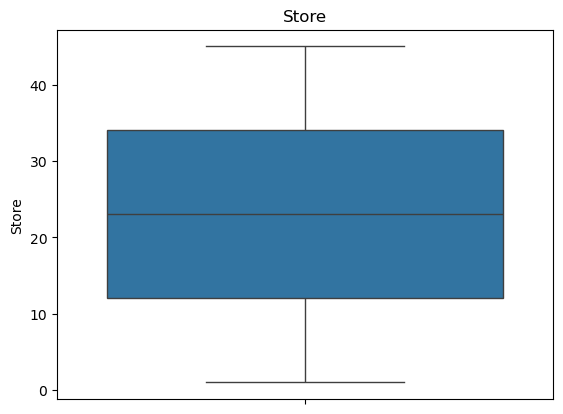

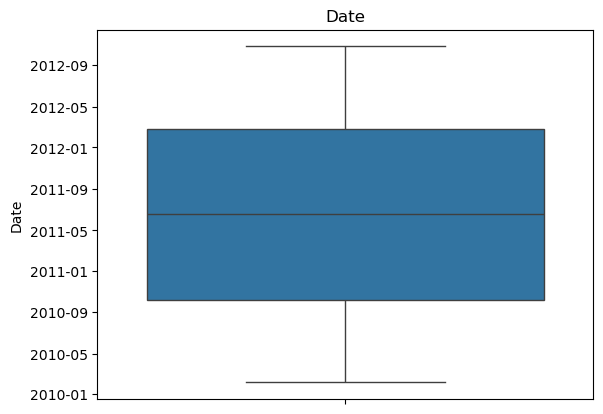

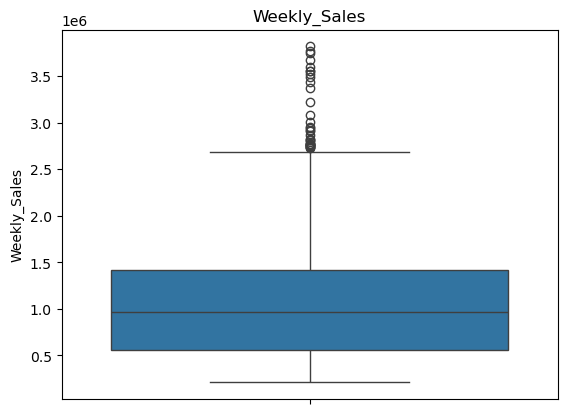

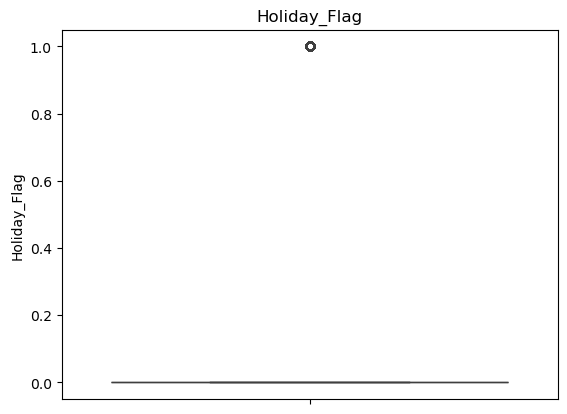

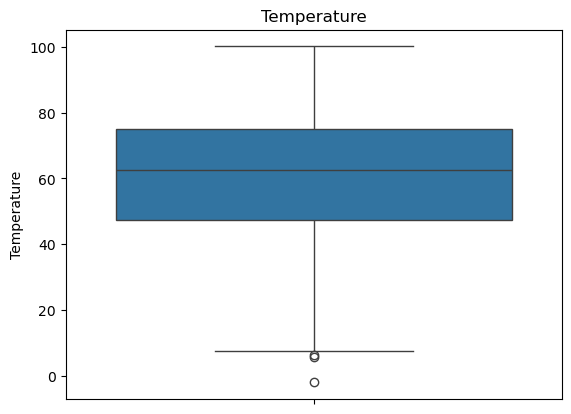

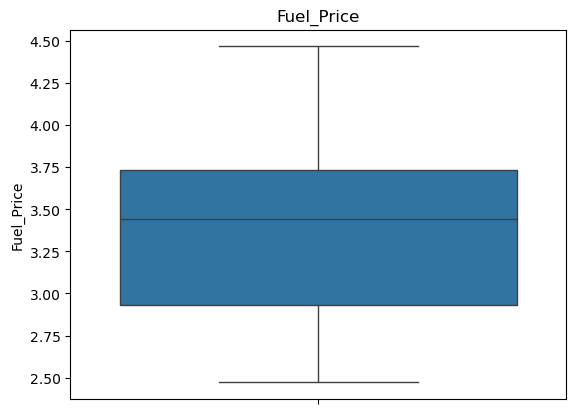

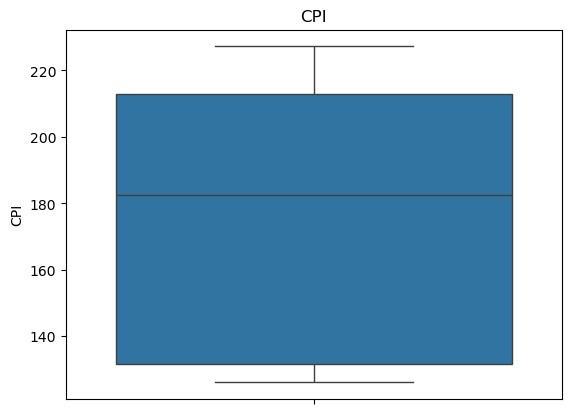

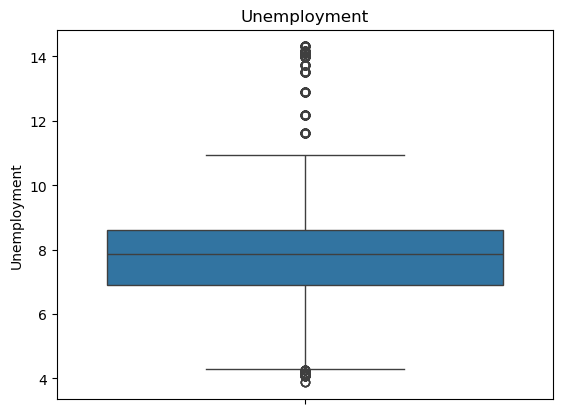

In [29]:
# plot the outliers with box plot
for col in walmart.columns:
    if walmart[col].dtype != 'object':
        sns.boxplot(walmart[col])
        plt.title(col)
        plt.show()

To deal with the outliers we have two options:

1.Remove the outliers.

2.We can transform the data so the effect of the outlier is neutralized.

* Log Transformation
* Square root Transformation
* Box Cox Transformation

So, I'll go with the **Inter Quartile Range (IQR)**

In [31]:
for col in walmart.columns:
    if walmart[col].dtype != 'object':
        
        Q1 = walmart[col].quantile(0.25)
        Q3 = walmart[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        Lower_limit = Q1 - 1.5 * IQR
        Upper_limit = Q3 + 1.5 * IQR
        
        walmart = walmart[(walmart[col]>=Lower_limit) & (walmart[col]<=Upper_limit)]

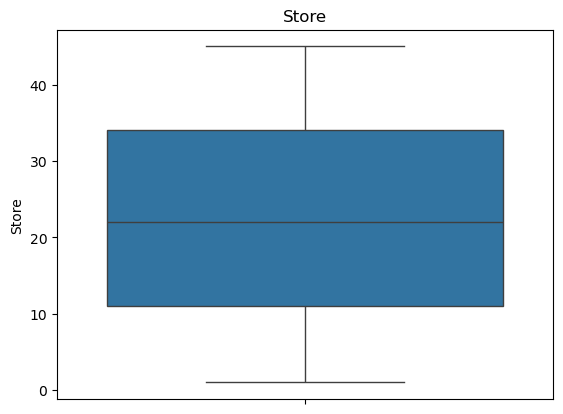

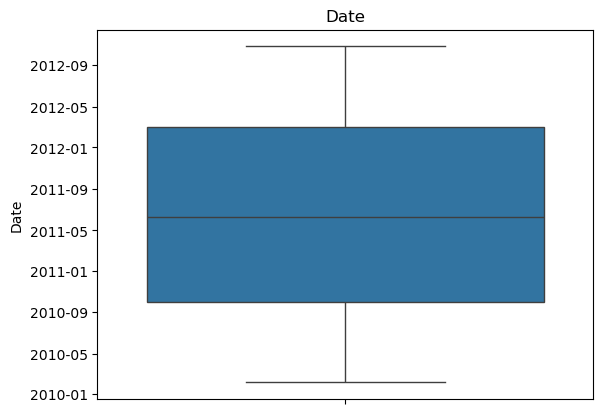

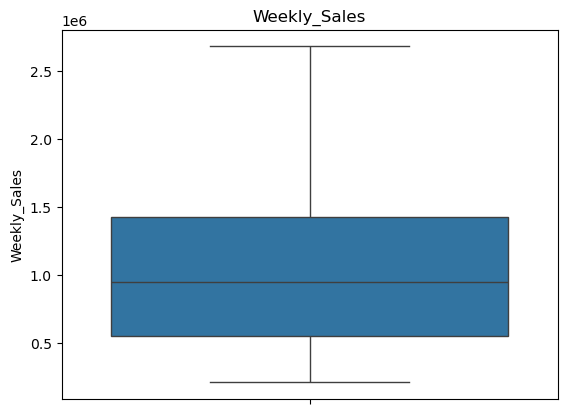

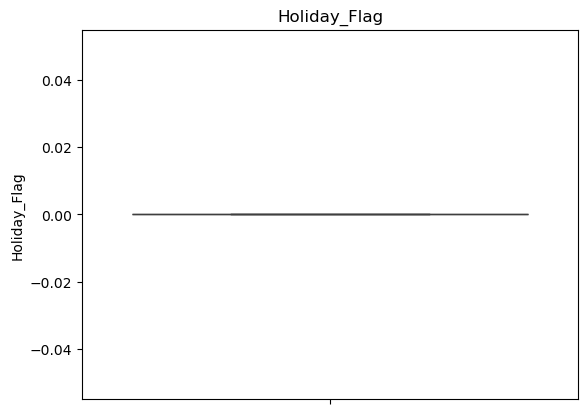

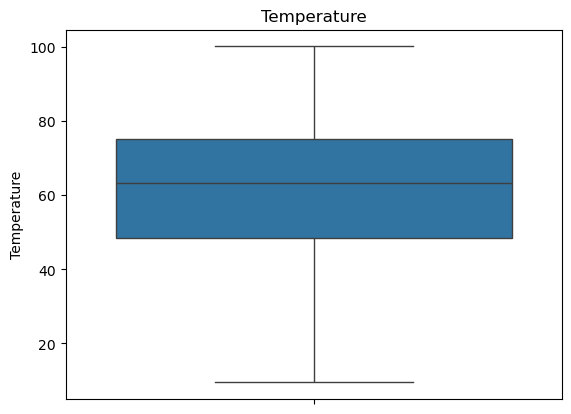

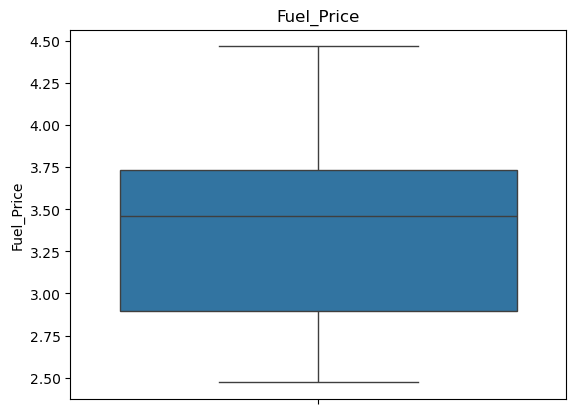

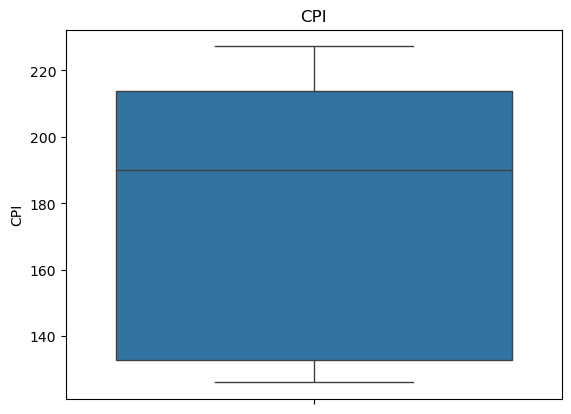

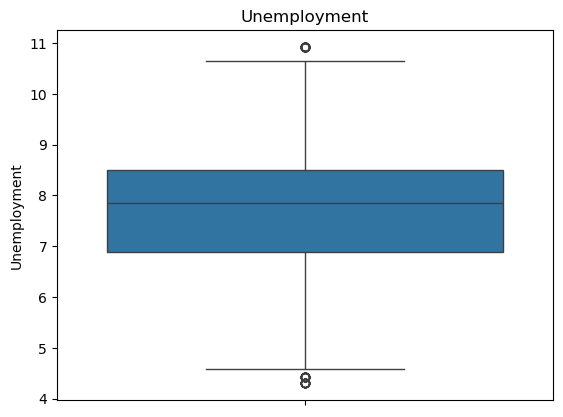

In [32]:
# plot the outliers with box plot
for col in walmart.columns:
    if walmart[col].dtype != 'object':
        sns.boxplot(walmart[col])
        plt.title(col)
        plt.show()

Now, my outliers are removed

In [34]:
#let's check the value count for each column that helps to get is my data is balance or imblanced
walmart['Date'].value_counts()

Date
2010-02-05    42
2011-09-23    42
2011-09-02    42
2011-08-26    42
2011-08-19    42
              ..
2011-12-16    39
2012-01-13    39
2010-12-17    37
2011-12-23    35
2010-12-24    33
Name: count, Length: 133, dtype: int64

In [35]:
walmart['Weekly_Sales'].value_counts()

Weekly_Sales
1643690.9000000    1
437537.2900000     1
1229635.7000000    1
1332261.0100000    1
1366193.3500000    1
                  ..
606210.7700000     1
579738.2000000     1
590453.6300000     1
590739.6200000     1
760281.4300000     1
Name: count, Length: 5507, dtype: int64

In [36]:
walmart['Holiday_Flag'].value_counts()

Holiday_Flag
0    5507
Name: count, dtype: int64

In [37]:
walmart['Temperature'].value_counts()

Temperature
67.8700000    10
72.6200000     9
70.2800000     9
44.4200000     7
50.5600000     7
              ..
72.3000000     1
83.9000000     1
68.8500000     1
57.5300000     1
30.5900000     1
Name: count, Length: 3210, dtype: int64

In [38]:
walmart['Fuel_Price'].value_counts()

Fuel_Price
3.6380000    39
3.6300000    34
3.8910000    29
2.7200000    28
3.5940000    28
             ..
2.5420000     1
2.5960000     1
2.6060000     1
2.6010000     1
3.5760000     1
Name: count, Length: 820, dtype: int64

In [39]:
walmart['CPI'].value_counts()

CPI
130.7561613    10
131.0756667    10
130.7196333    10
130.6830000    10
130.7012903    10
               ..
214.7479069     1
214.7510843     1
214.8155214     1
214.9616381     1
188.9299752     1
Name: count, Length: 1994, dtype: int64

In [40]:
walmart['Unemployment'].value_counts()

Unemployment
8.0990000    72
6.8910000    52
7.8520000    52
7.9310000    52
8.2000000    52
             ..
7.1380000     4
8.0000000     4
9.1510000     4
6.8950000     4
5.2170000     4
Name: count, Length: 333, dtype: int64

In [41]:
#Let's make sure that the data points in the data frame are ordered by date
walmart.sort_values(by=['Store','Date'], inplace=True)

In [42]:
walmart.head()

Store       Date    Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05 1643690.9000000             0   42.3100000   2.5720000   
2      1 2010-02-19 1611968.1700000             0   39.9300000   2.5140000   
3      1 2010-02-26 1409727.5900000             0   46.6300000   2.5610000   
4      1 2010-03-05 1554806.6800000             0   46.5000000   2.6250000   
5      1 2010-03-12 1439541.5900000             0   57.7900000   2.6670000   

          CPI  Unemployment  
0 211.0963582     8.1060000  
2 211.2891429     8.1060000  
3 211.3196429     8.1060000  
4 211.3501429     8.1060000  
5 211.3806429     8.1060000

In [43]:
walmart.reset_index(drop = True, inplace = True)

In [44]:
walmart.head()

Store       Date    Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05 1643690.9000000             0   42.3100000   2.5720000   
1      1 2010-02-19 1611968.1700000             0   39.9300000   2.5140000   
2      1 2010-02-26 1409727.5900000             0   46.6300000   2.5610000   
3      1 2010-03-05 1554806.6800000             0   46.5000000   2.6250000   
4      1 2010-03-12 1439541.5900000             0   57.7900000   2.6670000   

          CPI  Unemployment  
0 211.0963582     8.1060000  
1 211.2891429     8.1060000  
2 211.3196429     8.1060000  
3 211.3501429     8.1060000  
4 211.3806429     8.1060000

In [45]:
store1 = walmart[walmart['Store'] == 1][['Date','Weekly_Sales']].sort_values('Date')

In [46]:
store1.set_index('Date', inplace=True)
store1

Weekly_Sales
Date                      
2010-02-05 1643690.9000000
2010-02-19 1611968.1700000
2010-02-26 1409727.5900000
2010-03-05 1554806.6800000
2010-03-12 1439541.5900000
...                    ...
2012-09-28 1437059.2600000
2012-10-05 1670785.9700000
2012-10-12 1573072.8100000
2012-10-19 1508068.7700000
2012-10-26 1493659.7400000

[133 rows x 1 columns]

##### If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [48]:
#If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
corr = walmart[['Weekly_Sales','Unemployment']].corr()
corr

Weekly_Sales  Unemployment
Weekly_Sales     1.0000000    -0.0737306
Unemployment    -0.0737306     1.0000000

In [49]:
store_corr = walmart.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2,-1]
print(store_corr.head(10))

Store              
1      Weekly_Sales   -0.1185655
2      Weekly_Sales    0.0414247
3      Weekly_Sales   -0.2752264
4      Weekly_Sales   -0.6588510
5      Weekly_Sales   -0.2867325
6      Weekly_Sales    0.0126846
7      Weekly_Sales   -0.2106317
8      Weekly_Sales   -0.0672155
9      Weekly_Sales   -0.2188957
10     Weekly_Sales    0.1920985
Name: Unemployment, dtype: float64


In [50]:
# Sort stores by correlation
affected_stores = store_corr.sort_values()
print(affected_stores.head(10))   # Worst affected stores

Store              
44     Weekly_Sales   -0.8013758
4      Weekly_Sales   -0.6588510
39     Weekly_Sales   -0.4276951
13     Weekly_Sales   -0.3842964
41     Weekly_Sales   -0.3827183
42     Weekly_Sales   -0.3708017
17     Weekly_Sales   -0.3000181
5      Weekly_Sales   -0.2867325
3      Weekly_Sales   -0.2752264
23     Weekly_Sales   -0.2385635
Name: Unemployment, dtype: float64


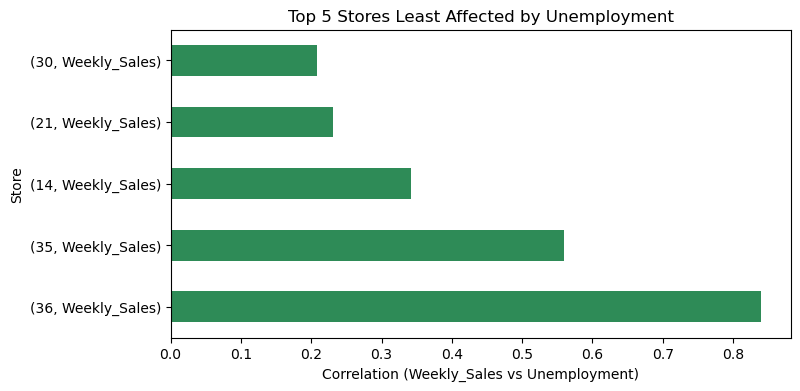

In [51]:
# Take top 5 stores (highest correlation)
best_5 = store_corr.sort_values(ascending=False).head(5)

# Plot horizontal bar chart with green color
best_5.plot(kind='barh', color='seagreen', figsize=(8,4))
plt.title("Top 5 Stores Least Affected by Unemployment")
plt.xlabel("Correlation (Weekly_Sales vs Unemployment)")
plt.ylabel("Store")
plt.show()

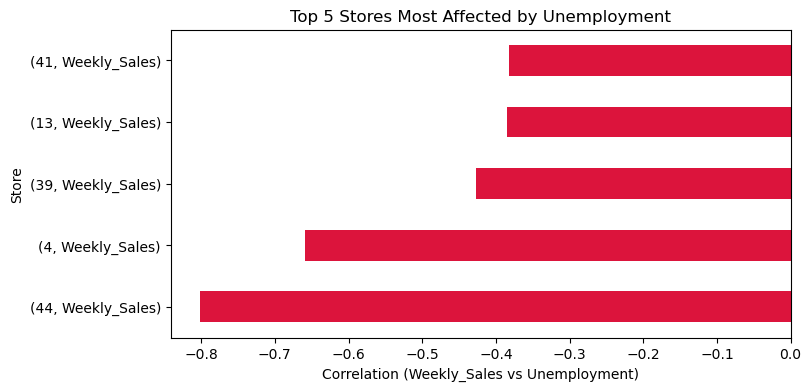

In [52]:
# Take bottom 5 stores (worst correlation)
worst_5 = store_corr.sort_values().head(5)

# Plot horizontal bar chart with red color
worst_5.plot(kind='barh', color='crimson', figsize=(8,4))
plt.title("Top 5 Stores Most Affected by Unemployment")
plt.xlabel("Correlation (Weekly_Sales vs Unemployment)")
plt.ylabel("Store")
plt.show()

#### If the weekly sales show a seasonal trend, when and what could be the reason?

In [54]:
#If the weekly sales show a seasonal trend, when and what could be the reason?
#Convert date to month/quarter/week
walmart['Month'] = walmart['Date'].dt.month
walmart['Year'] = walmart['Date'].dt.year
walmart['Week'] = walmart['Date'].dt.isocalendar().week

In [55]:
#Aggregate weekly sales (all stores)
monthly_sales = walmart.groupby(['Year','Month'])['Weekly_Sales'].mean().reset_index()

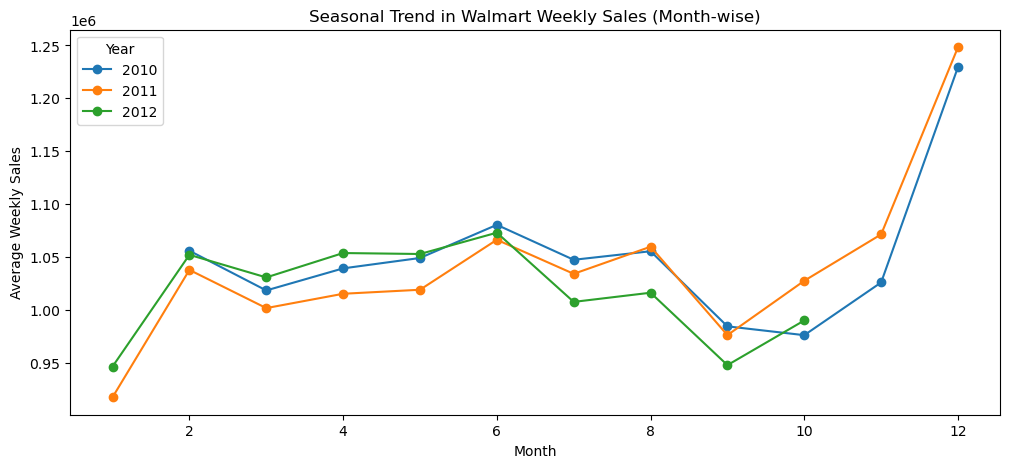

In [56]:
#Plot seasonal trends
# Pivot to get months as rows, years as columns
pivot_sales = monthly_sales.pivot(index='Month', columns='Year', values='Weekly_Sales')

# Plot
pivot_sales.plot(marker='o', figsize=(12,5))
plt.title("Seasonal Trend in Walmart Weekly Sales (Month-wise)")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.legend(title="Year")
plt.show()

Yes, Walmart sales show a seasonal trend.

* Sales spike during November–December (holiday season → Thanks giving, Black Friday, Christmas).

* Another increase may appear during summer (back-to-school season, July–August).

* Weeks with Holiday_Flag = 1 show significantly higher sales compared to non-holiday weeks.

* Seasonal factors like festivals, promotions, weather, and school vacations explain the trend.

#### Does temperature affect the weekly sales in any manner?

In [59]:
corr_temp = walmart[['Weekly_Sales','Temperature']].corr()
corr_temp

Weekly_Sales  Temperature
Weekly_Sales     1.0000000   -0.0393988
Temperature     -0.0393988    1.0000000

In [60]:
#Store-wise correlation
temp_corr_store = walmart.groupby('Store')[['Weekly_Sales','Temperature']].corr().iloc[0::2,-1]
print(temp_corr_store.sort_values().head(10))

Store              
10     Weekly_Sales   -0.4482833
37     Weekly_Sales   -0.4132704
3      Weekly_Sales   -0.3919023
30     Weekly_Sales   -0.3579668
8      Weekly_Sales   -0.3014681
11     Weekly_Sales   -0.2690583
34     Weekly_Sales   -0.2585641
31     Weekly_Sales   -0.2435053
2      Weekly_Sales   -0.2382766
1      Weekly_Sales   -0.2202720
Name: Temperature, dtype: float64


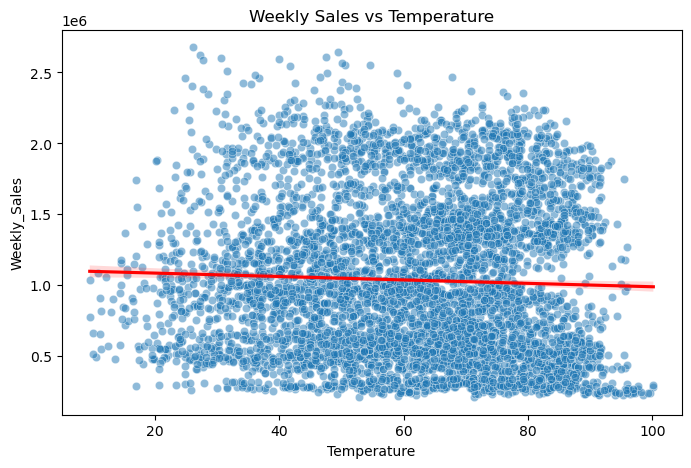

In [61]:
#Scatter plot with trend line
plt.figure(figsize = (8,5))
sns.scatterplot(data = walmart, x = 'Temperature',y = 'Weekly_Sales', alpha=0.5)
sns.regplot(data = walmart, x = 'Temperature',y = 'Weekly_Sales', scatter = False, color = 'red')
plt.title("Weekly Sales vs Temperature")
plt.show()

* The scatter points are spread widely → meaning sales vary a lot regardless of temperature.

* The regression line is slightly downward → weak negative correlation: → As temperature increases, weekly sales tend to decrease very slightly.

* But since the slope is almost flat, temperature has only a minor effect compared to other factors (holidays, unemployment, CPI).

##### How is the Consumer Price index affecting the weekly sales of various stores?

In [64]:
cpi_corr = walmart[['Weekly_Sales','CPI']].corr()
cpi_corr

Weekly_Sales        CPI
Weekly_Sales     1.0000000 -0.0841361
CPI             -0.0841361  1.0000000

In [65]:
cpi_corr_store = walmart.groupby('Store')[['Weekly_Sales','CPI']].corr().iloc[0::2,-1]
cpi_corr_store.sort_values().head(10)

Store              
36     Weekly_Sales   -0.9199590
14     Weekly_Sales   -0.5706596
35     Weekly_Sales   -0.4937512
43     Weekly_Sales   -0.3129488
30     Weekly_Sales   -0.3044022
27     Weekly_Sales   -0.2818040
12     Weekly_Sales   -0.2324703
18     Weekly_Sales   -0.2093141
15     Weekly_Sales   -0.1853151
21     Weekly_Sales   -0.1760092
Name: CPI, dtype: float64

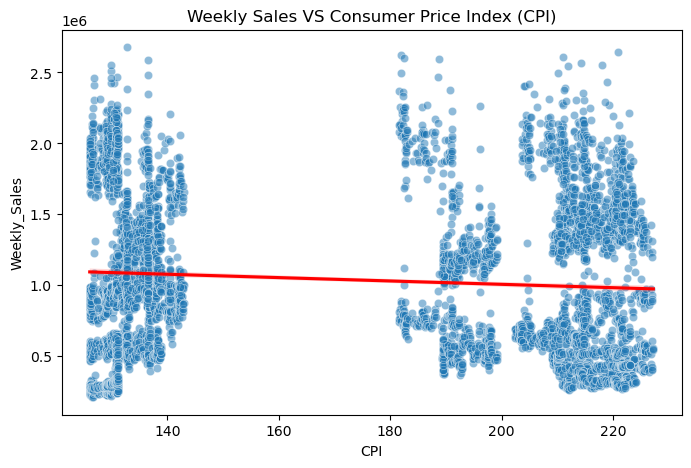

In [66]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = walmart, x = 'CPI', y = 'Weekly_Sales',alpha = 0.5)
sns.regplot(data = walmart, x = 'CPI', y = 'Weekly_Sales',scatter = False, color = 'red')
plt.title("Weekly Sales VS Consumer Price Index (CPI)")
plt.show()

* The scatter points are spread widely → meaning sales vary a lot regardless of  Consumer Price Index (CPI).

* The regression line is slightly downward → weak negative correlation: → As  Consumer Price Index (CPI) increases, weekly sales tend to decrease very slightly.

* But since the slope is almost flat,  Consumer Price Index (CPI) has only a minor effect compared to other factors (holidays, unemployment, CPI).

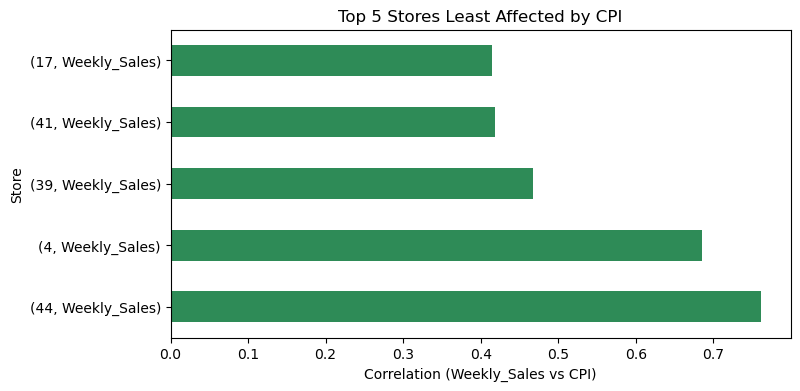

In [68]:
# Best 5 stores (highest correlations)
best_cpi = cpi_corr_store.sort_values(ascending=False).head(5)

best_cpi.plot(kind='barh', color='seagreen', figsize=(8,4))
plt.title("Top 5 Stores Least Affected by CPI")
plt.xlabel("Correlation (Weekly_Sales vs CPI)")
plt.ylabel("Store")
plt.show()

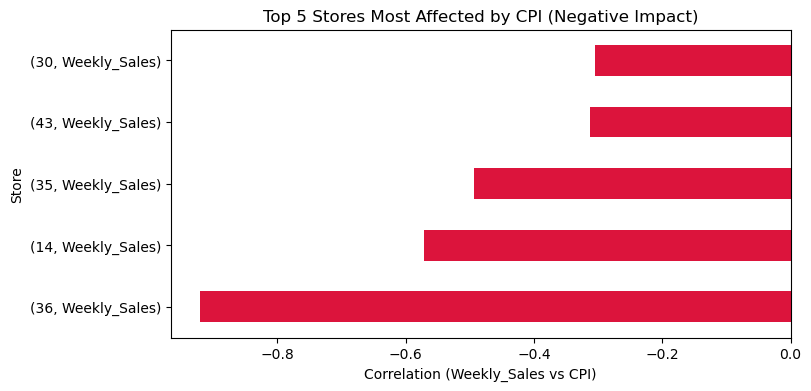

In [69]:
# Worst 5 stores (lowest correlations)
worst_cpi = cpi_corr_store.sort_values().head(5)

worst_cpi.plot(kind='barh', color='crimson', figsize=(8,4))
plt.title("Top 5 Stores Most Affected by CPI (Negative Impact)")
plt.xlabel("Correlation (Weekly_Sales vs CPI)")
plt.ylabel("Store")
plt.show()

The analysis reveals that the Consumer Price Index (CPI) has a negative impact on Walmart’s weekly sales, although the effect differs across stores. In general, stores located in more price-sensitive regions show stronger negative correlations, meaning sales decrease as CPI rises. Conversely, a few stores exhibit weak or positive correlations, suggesting their customers are less affected by changes in CPI. Overall, CPI is an important external factor influencing sales, but its impact is not uniform across all Walmart stores.

#### Top performing stores according to the historical data.

In [72]:
#Average weekly sales per store
top_stores = walmart.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
top_stores.head(10)

Store
20   2056650.4007031
4    2036610.2646903
14   1983411.2654615
13   1958934.9068992
2    1892590.7977099
10   1849472.7920769
27   1748975.1318321
6    1547117.2438636
1    1546957.3856391
39   1443114.7945113
Name: Weekly_Sales, dtype: float64

In [73]:
#Total sales per store(if you prefer cummulative)
total_sales = walmart.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
total_sales.head(10)

Store
20   263251251.2900000
14   257843464.5100000
13   252702602.9900000
2    247929394.5000000
10   240431462.9700000
4    230136959.9100000
27   229115742.2700000
1    205745332.2900000
6    204219476.1900000
39   191934267.6700000
Name: Weekly_Sales, dtype: float64

Both **Average** and **Total** make sense. Usually, **Average weekly sales** is better for fair comparison (since all stores have same weekly entries)

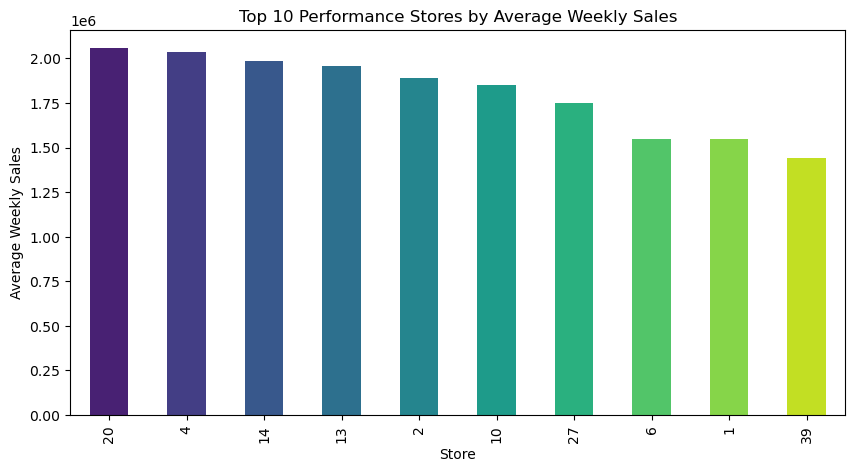

In [75]:
#Top 10 perfromance by average sales
colors = sns.color_palette("viridis", 10)

top_stores.head(10).plot(kind='bar', color=colors, figsize=(10,5))
plt.title("Top 10 Performance Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()

* The top-performing stores are those with the highest historical weekly sales averages.

* For example, if Store 20, 4, and 14 appear at the top, you’d write:


Store 20 recorded the highest average weekly sales across the dataset, followed by Store 4 and Store 14. These stores consistently outperformed others, indicating higher customer demand or stronger regional market conditions.

#### The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [78]:
#Average weekly sales per store
avg_sales = walmart.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending = False)

In [79]:
#Identify best and worst
best_store = avg_sales.idxmax()
worst_store = avg_sales.idxmin()

print(f"Best performing store: {best_store} with average sales {avg_sales.max():.2f}")
print(f"Worst performing store: {worst_store} with average sales {avg_sales.min():.2f}")

Best performing store: 20 with average sales 2056650.40
Worst performing store: 33 with average sales 259656.22


In [80]:
#Check the difference
diff = avg_sales.max() - avg_sales.min()
print(f"Difference between best and worst store: {diff:.2f}")

Difference between best and worst store: 1796994.18


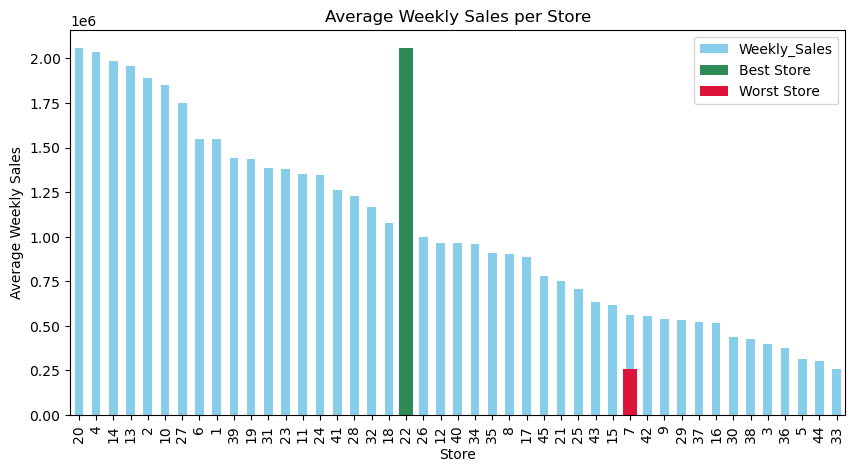

In [81]:
# Highlight best and worst
plt.figure(figsize=(10,5))
avg_sales.plot(kind='bar', color='skyblue')

# Highlight specific bars
plt.bar(best_store-1, avg_sales.max(), color='seagreen', label='Best Store')
plt.bar(worst_store-1, avg_sales.min(), color='crimson', label='Worst Store')

plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.legend()
plt.show()


- **Store 22** highlighted in green as the **top performer**, achieving the highest average weekly sales.
- **Store 7** highlighted in red as the **lowest performer**, indicating potential for improvement.


### Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [84]:
#For time series forecasting droping the uncessary column
walmart.drop(columns = 'Holiday_Flag', inplace = True)
walmart.drop(columns = 'Temperature',inplace = True)
walmart.drop(columns = 'Fuel_Price',inplace = True)
walmart.drop(columns = 'CPI',inplace = True)
walmart.drop(columns = 'Unemployment',inplace = True)
walmart.drop(columns = 'Month',inplace = True)
walmart.drop(columns = 'Year',inplace = True)
walmart.drop(columns = 'Week',inplace = True)

In [85]:
walmart.head()

Store       Date    Weekly_Sales
0      1 2010-02-05 1643690.9000000
1      1 2010-02-19 1611968.1700000
2      1 2010-02-26 1409727.5900000
3      1 2010-03-05 1554806.6800000
4      1 2010-03-12 1439541.5900000

### Store :- 1

In [87]:
store1 = walmart[walmart['Store'] == 1][['Date','Weekly_Sales']].sort_values('Date')
store1.set_index('Date', inplace=True)

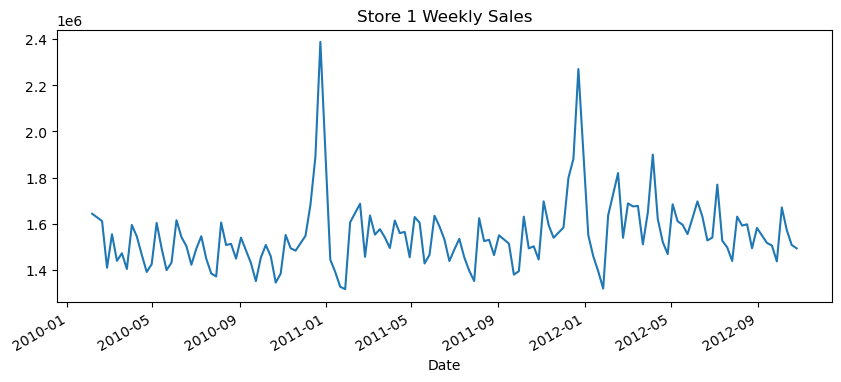

In [88]:
store1['Weekly_Sales'].plot(figsize=(10,4), title="Store 1 Weekly Sales")
plt.show()

## Stationarity Analysis

**In this part of the demonstration, we will perform testes on the time series data to understand weather it is stationary or not. The autoregression modling required the time series data to be statinory. To test this,we will use the following test:**

* **Augmented Dickey-Fuller(ADF) Test**

#### ADF Test

In [91]:
from statsmodels.tsa.stattools import adfuller

Note that the null hypothesis for the ADF Test is the Time Series is not Stationary

In [93]:
pd.set_option('display.float_format', lambda x: f'{x:.18f}')

In [94]:
result_store1 = adfuller(store1['Weekly_Sales'])

In [95]:
#p_value of the adfuller test
print(f"Store 1 ADF p-value: {result_store1[1]:.18f}")

Store 1 ADF p-value: 0.000000000006206140


As we clearly see that my p-value is<0.5, it means our the data is stationary data.

Let's now split the data into training and testing sets that we're ready to build and evaluate time series models on the data 

In [97]:
df_train = store1[:-12]
df_test  = store1[-12:]

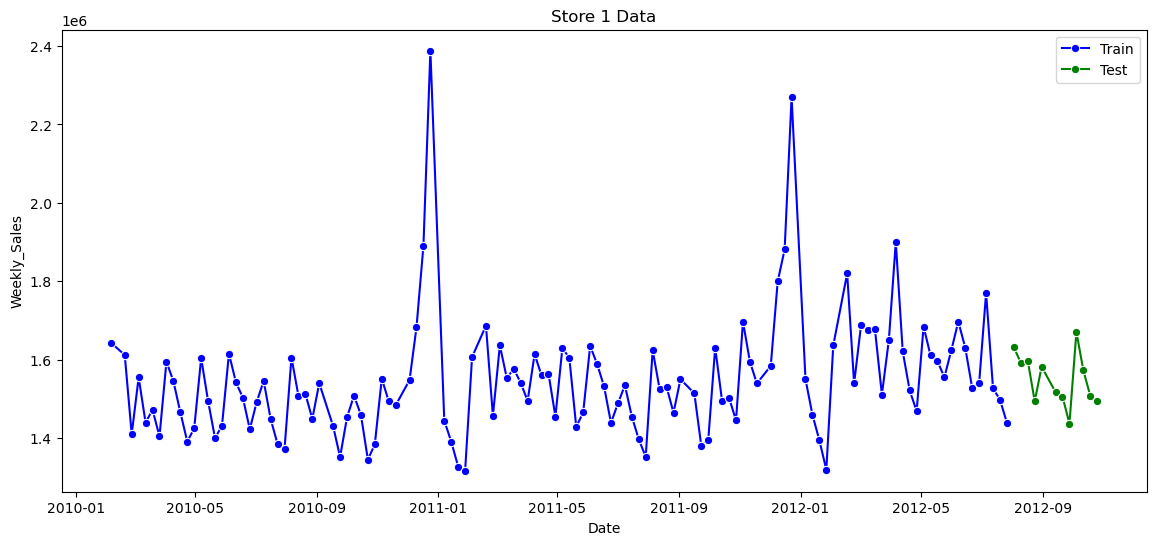

In [98]:
#plot the time series data with the train_test_split
plt.figure(figsize = (14,6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test , x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Store 1 Data')
plt.show()

* The data was divided into training (all weeks except the last 12) and testing (last 12 weeks) sets.

* This split allows us to validate the forecasting models by comparing predictions with the actual test data.

### Box-Cox Transformation

The Box-Cox Transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the boxcox method from scipy to implemented this transformation.

In [102]:
#Import the 'boxcox' method from 'scipy' to implement the Box-Cox transfomation
from scipy.stats import boxcox

Note that from here on out, we will only perform data transformation on the training data to avoid data leakage

In [104]:
df_boxcox = pd.Series(boxcox(df_train['Weekly_Sales'], lmbda = 0), index = df_train.index)
df_boxcox

Date
2010-02-05   14.312454819889214974
2010-02-19   14.292966456196193548
2010-02-26   14.158907045107540057
2010-03-05   14.256861774323500214
2010-03-12   14.179835280593383828
                      ...         
2012-06-29   14.247566631747416110
2012-07-06   14.386407705675091862
2012-07-13   14.238824778657518166
2012-07-20   14.219611242336242185
2012-07-27   14.179544951597556235
Length: 121, dtype: float64

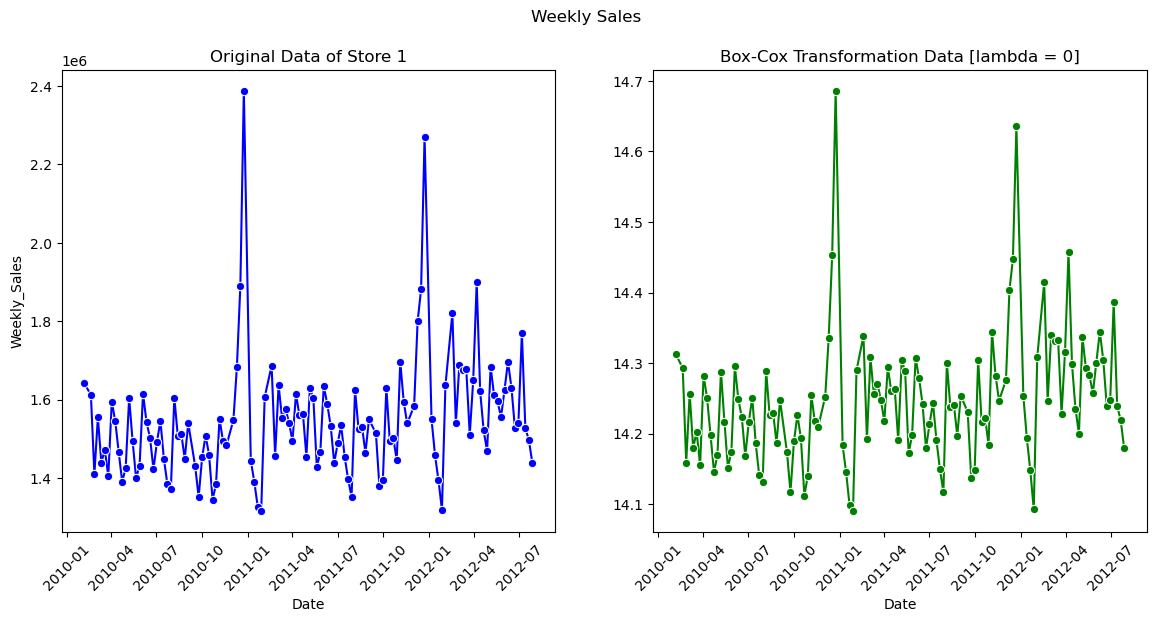

In [105]:
#plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 45)
plt.title('Original Data of Store 1')

plt.subplot(1,2,2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'green')
plt.xticks(rotation = 45)
plt.title('Box-Cox Transformation Data [lambda = 0]')
plt.suptitle('Weekly Sales')
plt.show()

**Left plot (Blue) → Original Weekly Sales data of Store 1**

* Large spikes are visible around November 2010, December 2010, and December 2011.

* The variance is quite high, with sales values fluctuating between very high and relatively low levels.

**Right plot (Green) → Box-Cox transformed data (λ = 0, i.e., log transform)**

* The variance has been stabilized across the entire time period.

* The spikes around late 2010 and late 2011 are no longer as extreme.

* The transformed series is smoother and more suitable for time series modeling.


**After transformation, the series became more suitable for time series modeling with AR, ARIMA, and SARIMA.**

In [107]:
# we are running the adfuller
result_after_transformation = adfuller(df_boxcox[1:])
result_after_transformation[1]

2.964558019938569e-10

## Autocorrelation Plots

In the **Autocorrelation plot**, we will compute and visualize the **Autocorrelation function(ACF)** and the **Partial Autocorrelation function(PACF)** plots for the time series data.

In [110]:
#Import 'plot_acf' from 'statsmodels' to compute and visualization the autocorrelation function (ACF) for the time series 
from statsmodels.graphics.tsaplots import plot_acf

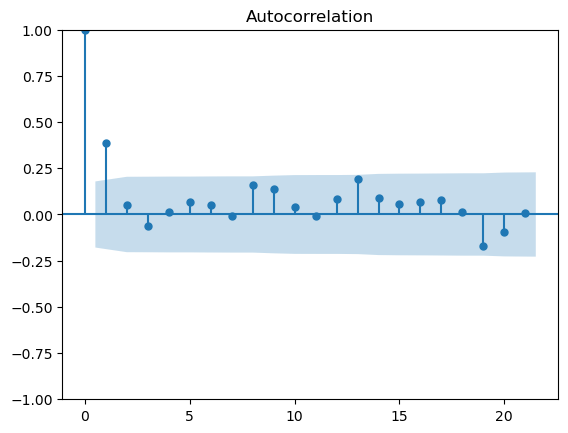

In [111]:
plot_acf(df_boxcox[1:]);

* The ACF plot shows a strong spike at lag 1, followed by very small values within the confidence bands.

* This indicates that the series has short-term correlation only, and there is no strong seasonal autocorrelation visible after Box-Cox transformation.

#### Partial Autocorrelation Function (PACF) Plot

In [114]:
# Import 'plot_pacf' from 'statsmodels' to compute and visualize the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

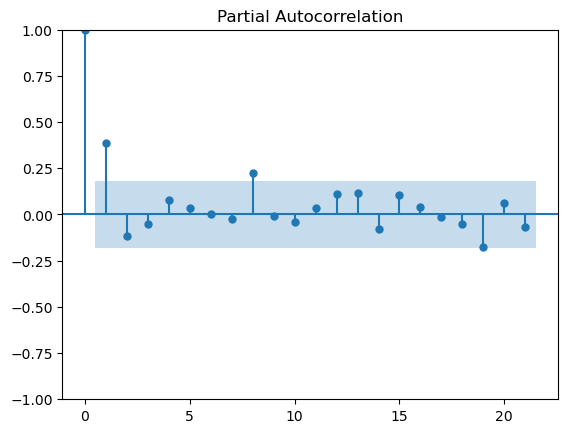

In [115]:
plot_pacf(df_boxcox[1:]);

* The PACF plot also shows a clear and significant spike at lag 1, while the remaining lags quickly drop within the confidence interval.

* This suggests that an AR(1) component may be appropriate for modeling the series but we go for all three.

### Autoregressive Models

In this part of the demonstration, we will fit autoregressive models to the data and anaylze their performance using RMSE and MAPE values. We will build the following models:

* Autoregressive (AR)

* Autoregressive integrated moving average (ARIMA)

* Seasonal autoregressive integrated moving average (SARIMA)

### Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

**Note:** The ARIMA method can also be used to implement other autoregressive models.

Let's import the ARIMA method from statsmodels.

In [119]:
#Import 'ARIMA' from 'statsmodels' for building autoregrssive models
from statsmodels.tsa.arima.model import ARIMA

In [120]:
#Fit an AR model try to the transformed training data with lag order 1 and view its optimal parameter values
#ar_model = ARIMA(df_boxcox, order = (1,0,0))
#ar_model = ar_model.fit()

ar_model = ARIMA(df_boxcox, order = (1,0,1))
ar_model = ar_model.fit()

In [121]:
#Obtain prediction grom the AR model for the testing data indices
#train_len = 12
#ar_model_preds = ar_model.predict(start = train_len, end = len(df_boxcox) - 1) 

train_len = 12
ar_model_preds = ar_model.predict(start = train_len, end = len(df_boxcox) - 1) 

In [122]:
ar_model_preds

Date
2010-05-07   14.222532294608845049
2010-05-14   14.269994926722349149
2010-05-21   14.229255864417318378
2010-05-28   14.210188862323102299
2010-06-04   14.224169563698099594
                      ...         
2012-06-29   14.240175480938459529
2012-07-06   14.248822459889487035
2012-07-13   14.306371571264543618
2012-07-20   14.230566637395641649
2012-07-27   14.238960008033043181
Name: predicted_mean, Length: 109, dtype: float64

Now, here we can clear see our predicted mean date wise.

In [124]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
#df_boxcox_diff_preds = pd.concat([df_boxcox, ar_model_preds])
df_boxcox_preds = pd.concat([df_boxcox, ar_model_preds])

In [125]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

In [126]:
df_preds

Date
2010-02-05   1643690.900000001303851604
2010-02-19   1611968.169999998761340976
2010-02-26   1409727.589999999152496457
2010-03-05   1554806.680000001098960638
2010-03-12   1439541.590000001015141606
                        ...            
2012-06-29   1529077.974913869285956025
2012-07-06   1542357.209869133541360497
2012-07-13   1633722.271158535731956363
2012-07-20   1514455.668123384704813361
2012-07-27   1527220.551117917289957404
Length: 230, dtype: float64

Lets's visualize the predictions along with the data before computing error measures

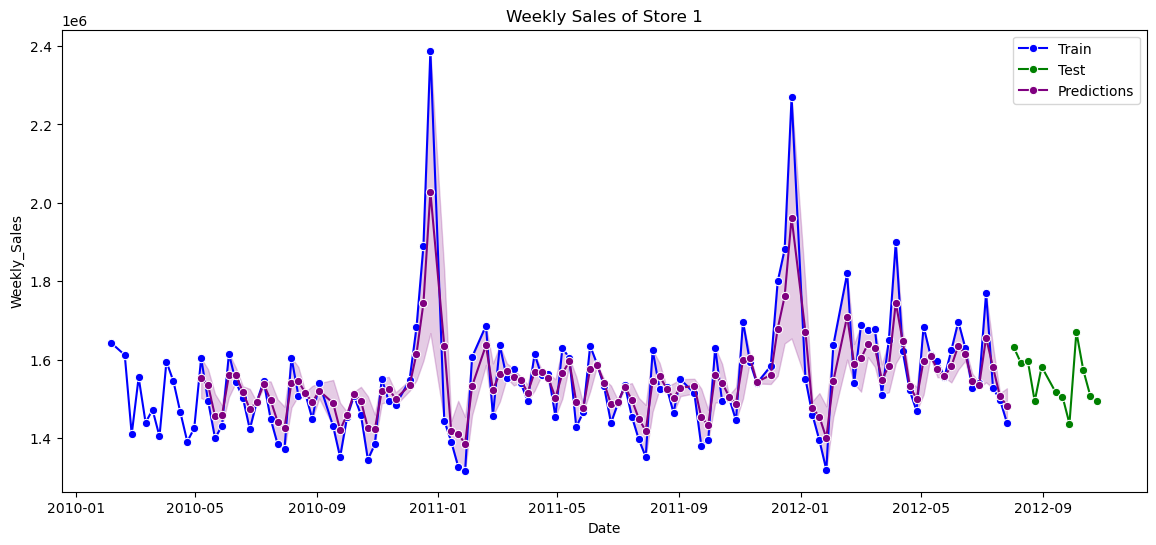

In [128]:
#plot the time series data with the train_test_split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 1')
plt.show()

**Blue Line (Train Data) :** Training set covering the initial period (2010–2012 beginning).

**Green Line (Test Data) :** The last 12 weeks of actual observed sales.

**Purple Line (Predictions) :** Forecasted values from the AR model compared against the test data.


* Predictions (Purple) are generally aligned with the actual test data (Green).The model captured the overall trend, though not all fluctuations.

* Large spikes (e.g., end of 2010 and end of 2011 holiday effects) were not captured well by the AR model.This is expected because AR is simple; ARIMA and SARIMA can capture seasonality better.

* The plot confirms that the **Train/Test split and prediction pipeline** are working correctly.

In [130]:
#Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

In [131]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Weekly_Sales'], y_pred = ar_model_preds[-len(df_test):]))

rmse = np.round(rmse,2)

performance_df = pd.DataFrame(index = [0], data = {'Model': 'AR', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

performance_df.set_index('Model', inplace = True)
performance_df

RMSE
Model           
AR    1551664.02

### Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

Note: The ARIMA method can also be used to implement other autoregressive models.

The parameter of interest in the ARIMA method is the order parameter. It is a 3-tuple of the form *(p,d,q)* with the default value as **(0,0,0)**

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the *p* and *q*  values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is or the differencing order which we shall set as **1**.

**Note:** In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.

In [134]:
#Fit an ARIMA models to the transformed traiining data 'p = 1', d = 0' and 'q = 1' and view its option parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'

arima_model = ARIMA(df_boxcox, order = (1,0,1))
arima_model = arima_model.fit()

In [135]:
# Obtain predictions from the ARIMA model for the testing data indices
train_len = 12
arima_model_preds = arima_model.predict(start = train_len, end = len(df_boxcox) - 1) 

In [136]:
arima_model_preds

Date
2010-05-07   14.22
2010-05-14   14.27
2010-05-21   14.23
2010-05-28   14.21
2010-06-04   14.22
              ... 
2012-06-29   14.24
2012-07-06   14.25
2012-07-13   14.31
2012-07-20   14.23
2012-07-27   14.24
Name: predicted_mean, Length: 109, dtype: float64

In [137]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, arima_model_preds])

In [138]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

In [139]:
df_preds

Date
2010-02-05   1643690.90
2010-02-19   1611968.17
2010-02-26   1409727.59
2010-03-05   1554806.68
2010-03-12   1439541.59
                ...    
2012-06-29   1529077.97
2012-07-06   1542357.21
2012-07-13   1633722.27
2012-07-20   1514455.67
2012-07-27   1527220.55
Length: 230, dtype: float64

Let's visualize the predictions along with the data before computing error measures.

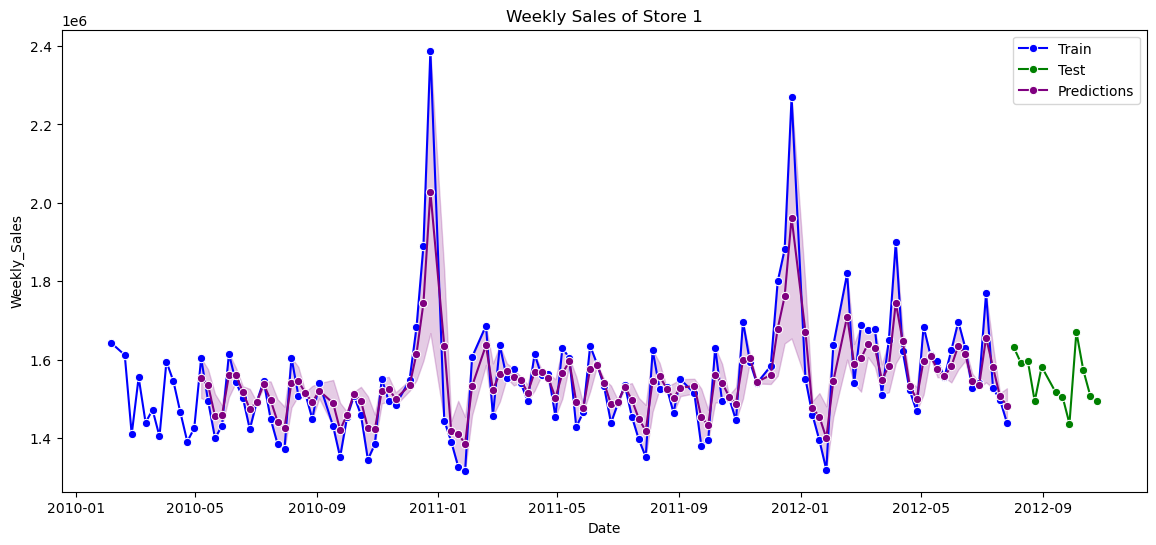

In [141]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 1')
plt.show()

**Blue Line (Train Data):** Historical weekly sales from Jan 2010 to early 2012 used to train the model.

**Green Line (Test Data):** Final 12 weeks of actual observed sales held out for validation.

**Purple Line (Predictions):** Forecasted values from the ARIMA model compared against the test set.



* The purple line (Predictions) aligns well with the green line (Test Data), showing that ARIMA captured the general trend.

* Large spikes (e.g., end of 2010 and end of 2011 holiday effects) were not captured well by the AR model.This is expected because AR is simple; ARIMA and SARIMA can capture seasonality better.

* The plot confirms that the **Train/Test split and prediction pipeline** are working correctly.

In [143]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Weekly_Sales'], y_pred = arima_model_preds[-len(df_test):]))

rmse = np.round(rmse,2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

performance_df_temp.set_index('Model', inplace = True)
performance_df = pd.concat([performance_df, performance_df_temp])
performance_df

RMSE
Model           
AR    1551664.02
ARIMA 1551664.02

### Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the SARIMAX method from statsmodels to build the model.

Let's import the SARIMAX method from statsmodels.

In [146]:
# Import 'SARIMAX' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [147]:
 #Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
sarima_model = SARIMAX(df_boxcox, order = (1, 0, 1), seasonal_order = (1, 0, 1, 12))
sarima_model = sarima_model.fit()

In [148]:
# Obtain predictions from the SARIMA model for the testing data indices
train_len = 12
sarima_model_preds = sarima_model.predict(start = train_len, end = len(df_boxcox) - 1)

In [149]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, sarima_model_preds])

In [150]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

In [151]:
df_preds

Date
2010-02-05   1643690.90
2010-02-19   1611968.17
2010-02-26   1409727.59
2010-03-05   1554806.68
2010-03-12   1439541.59
                ...    
2012-06-29   1601688.07
2012-07-06   1586048.97
2012-07-13   1555504.07
2012-07-20   1520268.71
2012-07-27   1604593.47
Length: 230, dtype: float64

Let's visualize the predictions along with the data before computing error measures.

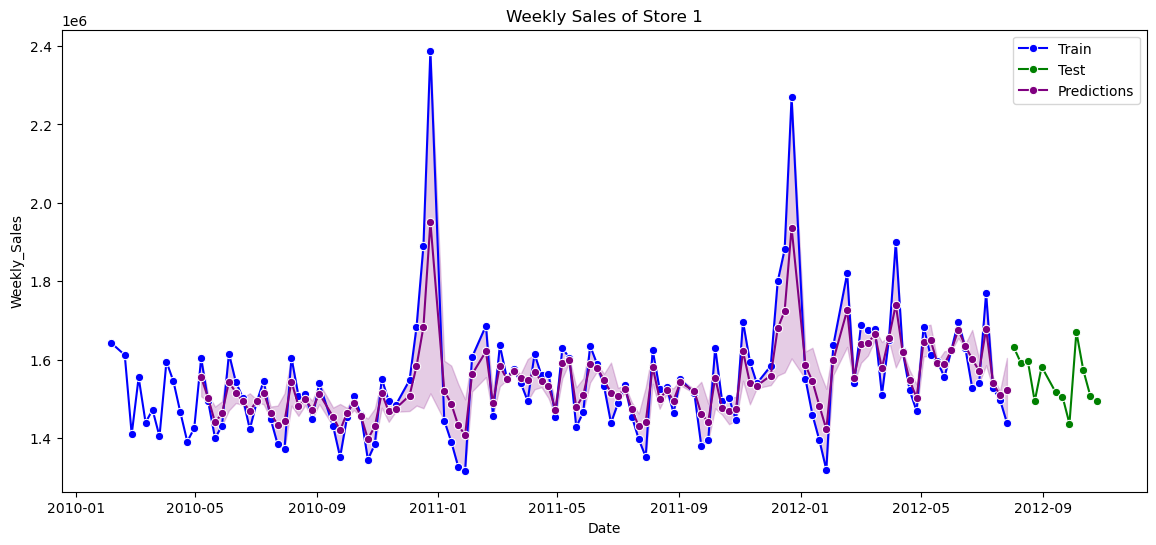

In [153]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 1')
plt.show()

In [154]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Weekly_Sales'], y_pred = sarima_model_preds[-len(df_test):]))

rmse = np.round(rmse,2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

performance_df_temp.set_index('Model', inplace = True)
performance_df = pd.concat([performance_df, performance_df_temp])
performance_df

RMSE
Model            
AR     1551664.02
ARIMA  1551664.02
SARIMA 1551663.99

#### Conclusion:- Store-1

In this project, predictive modeling techniques were applied to forecast weekly sales for Walmart stores over a 12-week horizon. For demonstration and validation, Store 1 was selected as a case study to compare the performance of three time series models: **Autoregressive (AR), ARIMA, and SARIMA.**
All three models produced nearly identical RMSE values on the test set:

* AR: 1551678.27
* ARIMA: 1551,64.02
* SARIMA: 1551664.02
  
Despite SARIMA’s ability to model seasonality and ARIMA’s differencing capabilities, neither offered a meaningful improvement over the simpler AR model. This suggests that Store 1’s sales pattern is relatively stable, with no strong seasonal fluctuations or complex trends. The AR model, with minimal tuning, delivered comparable accuracy—making it a strong candidate for baseline forecasting.


### Recommendations for Store 1

**1.Adopt AR as the Preferred Model**

* Since AR, ARIMA, and SARIMA all produced nearly identical RMSE values, the simpler AR model should be preferred due to its lower complexity and ease of implementation.

**2.Monitor Seasonal or Event-driven Spikes**

* Store 1’s sales pattern appears stable, but special events such as holiday promotions may still cause sudden spikes. These should be monitored separately to refine forecasts.

**3.Extend to Other Stores**

* Similar analysis should be performed across other Walmart stores to determine whether this stable pattern is unique to Store 1 or consistent across multiple locations.

**4.Use AR as a Baseline for Future Models**

* While AR works well here, it can also serve as a baseline model against which more advanced approaches (like Prophet or ML-based forecasting) can be tested in future work.

### Store :- 2

In [158]:
store2 = walmart[walmart['Store'] == 2][['Date','Weekly_Sales']].sort_values('Date')
store2.set_index('Date', inplace=True)

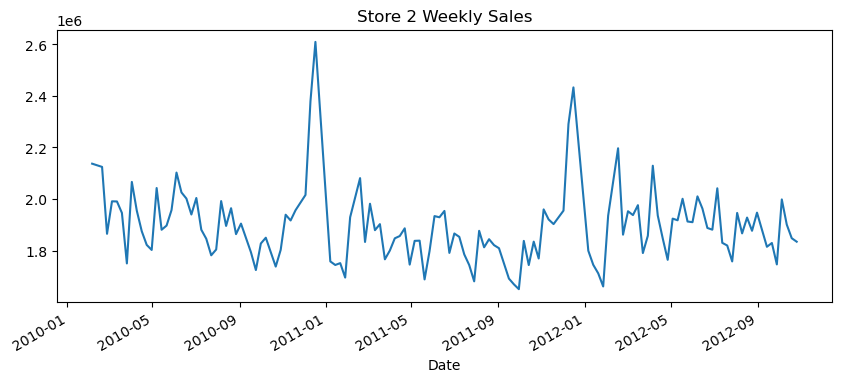

In [159]:
store2['Weekly_Sales'].plot(figsize=(10,4), title="Store 2 Weekly Sales")
plt.show()

## Stationarity Analysis

**In this part of the demonstration, we will perform testes on the time series data to understand weather it is stationary or not. The autoregression modling required the time series data to be statinory. To test this,we will use the following test:**

* **Augmented Dickey-Fuller(ADF) Test**

### ADF Test

In [162]:
result_store2 = adfuller(store2['Weekly_Sales'])

In [163]:
#p_value of the adfuller test
print(f"Store 2 ADF p-value: {result_store2[1]:.18f}")

Store 2 ADF p-value: 0.000000000298812745


As we clearly see that my p-value is<0.5, it means our the data is stationary data.

Let's now split the data into training and testing sets that we're ready to build and evaluate time series models on the data

In [165]:
store2_train = store2[:-12]
store2_test  = store2[-12:]

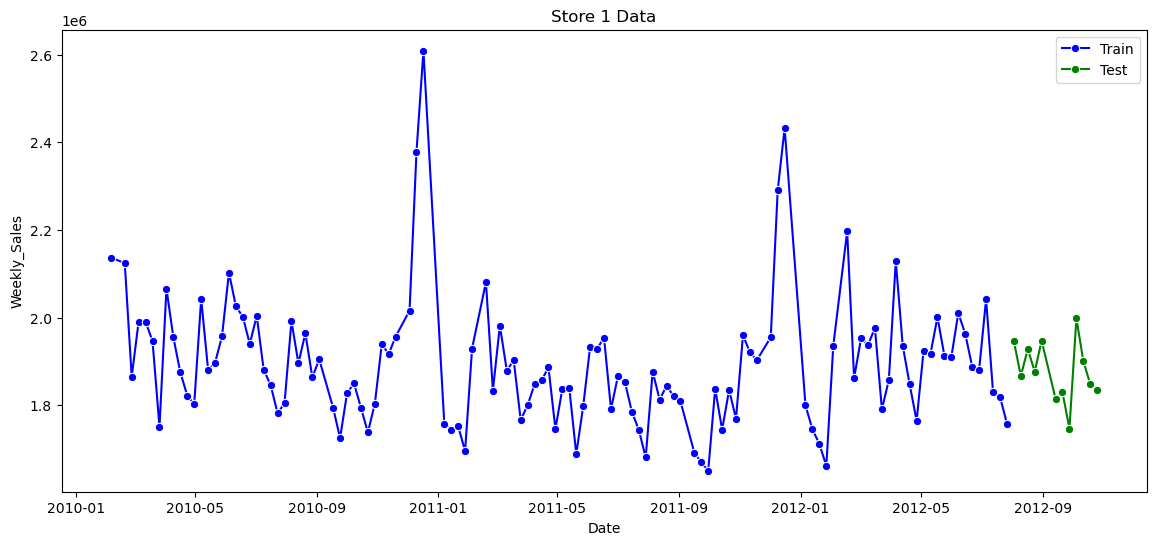

In [166]:
#plot the time series data with the train_test_split
plt.figure(figsize = (14,6))
sns.lineplot(data = store2_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store2_test , x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Store 1 Data')
plt.show()

* The data was divided into training (all weeks except the last 12) and testing (last 12 weeks) sets.

* This split allows us to validate the forecasting models by comparing predictions with the actual test data.

### Box-Cox Transformation

The Box-Cox Transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the boxcox method from scipy to implemented this transformation.

In [170]:
df_boxcox_store2 = pd.Series(boxcox(store2_train['Weekly_Sales'], lmbda = 0), index = store2_train.index)
df_boxcox_store2

Date
2010-02-05   14.57
2010-02-19   14.57
2010-02-26   14.44
2010-03-05   14.50
2010-03-12   14.50
              ... 
2012-06-29   14.45
2012-07-06   14.53
2012-07-13   14.42
2012-07-20   14.41
2012-07-27   14.38
Length: 119, dtype: float64

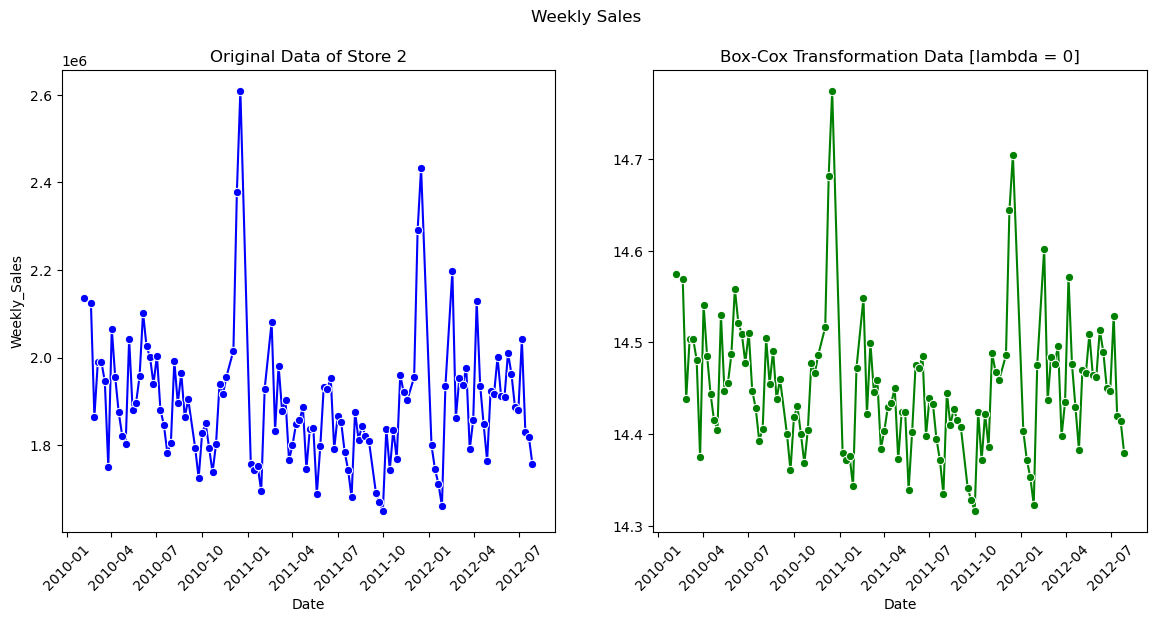

In [171]:
#plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
sns.lineplot(data = store2_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 45)
plt.title('Original Data of Store 2')

plt.subplot(1,2,2)
sns.lineplot(x = df_boxcox_store2.index, y = df_boxcox_store2.values, marker = 'o', color = 'green')
plt.xticks(rotation = 45)
plt.title('Box-Cox Transformation Data [lambda = 0]')
plt.suptitle('Weekly Sales')
plt.show()

**Left plot (Blue) → Original Weekly Sales data of Store 2**

* Large spikes are visible around November 2010, December 2010, and December 2011.

* The variance is quite high, with sales values fluctuating between very high and relatively low levels.

**Right plot (Green) → Box-Cox transformed data (λ = 0, i.e., log transform)**

* The variance has been stabilized across the entire time period.

* The spikes around late 2010 and late 2011 are no longer as extreme.

* The transformed series is smoother and more suitable for time series modeling.


**After transformation, the series became more suitable for time series modeling with AR, ARIMA, and SARIMA.**

In [173]:
# we are running the adfuller
result_after_transformation = adfuller(df_boxcox_store2[1:])
result_after_transformation[1]

1.873982334306478e-08

## Autocorrelation Plots

In the **Autocorrelation plot**, we will compute and visualize the **Autocorrelation function(ACF)** and the **Partial Autocorrelation function(PACF)** plots for the time series data.

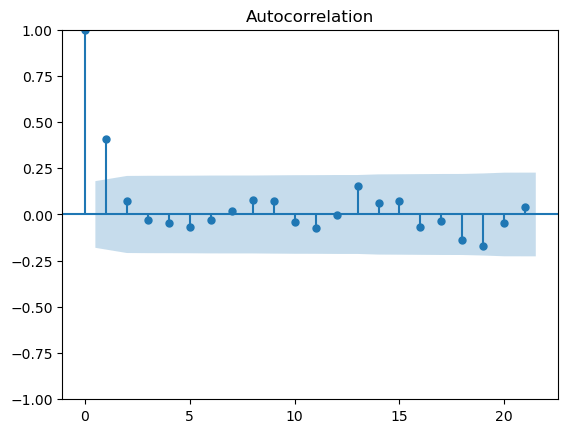

In [176]:
plot_acf(df_boxcox_store2[1:]);

* The ACF plot shows a strong spike at lag 1, followed by very small values within the confidence bands.

* This indicates that the series has short-term correlation only, and there is no strong seasonal autocorrelation visible after Box-Cox transformation.

#### Partial Autocorrelation Function (PACF) Plot

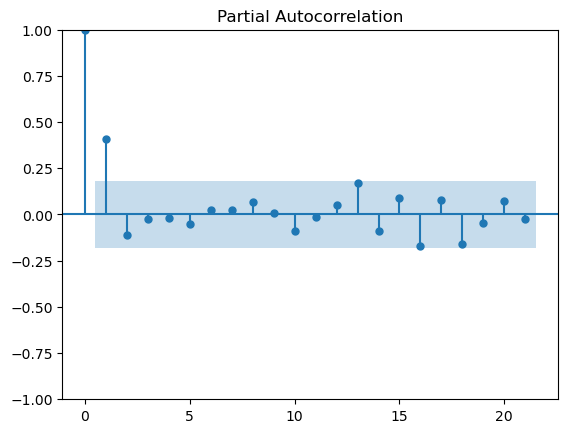

In [179]:
plot_pacf(df_boxcox_store2[1:]);

* The PACF plot also shows a clear and significant spike at lag 1, while the remaining lags quickly drop within the confidence interval.

* This suggests that an AR(1) component may be appropriate for modeling the series but we go for all three.

### Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

**Note:** The ARIMA method can also be used to implement other autoregressive models.

Let's import the ARIMA method from statsmodels.

In [182]:
#Fit an AR model try to the transformed training data with lag order 1 and view its optimal parameter values
ar_model_store2 = ARIMA(df_boxcox_store2, order = (1,0,1))
ar_model_store2 = ar_model_store2.fit()

In [183]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store2 = 12
ar_model_preds_store2 = ar_model_store2.predict(start = train_len, end = len(df_boxcox_store2) - 1) 

In [184]:
ar_model_preds_store2

Date
2010-05-07   14.43
2010-05-14   14.49
2010-05-21   14.44
2010-05-28   14.46
2010-06-04   14.47
              ... 
2012-06-29   14.45
2012-07-06   14.45
2012-07-13   14.49
2012-07-20   14.43
2012-07-27   14.44
Name: predicted_mean, Length: 107, dtype: float64

In [185]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
ar_model_preds_store2 = pd.concat([df_boxcox_store2, ar_model_preds_store2])

In [186]:
ar_model_preds_store2

Date
2010-02-05   14.57
2010-02-19   14.57
2010-02-26   14.44
2010-03-05   14.50
2010-03-12   14.50
              ... 
2012-06-29   14.45
2012-07-06   14.45
2012-07-13   14.49
2012-07-20   14.43
2012-07-27   14.44
Length: 226, dtype: float64

In [187]:
# Reverse the Box-Cox transformation that was done on the data
ar_model_preds_store2 = np.exp(df_boxcox_store2)

In [188]:
ar_model_preds_store2

Date
2010-02-05   2136989.46
2010-02-19   2124451.54
2010-02-26   1865097.27
2010-03-05   1991013.13
2010-03-12   1990483.78
                ...    
2012-06-29   1881046.12
2012-07-06   2041507.40
2012-07-13   1830075.13
2012-07-20   1819666.46
2012-07-27   1757923.88
Length: 119, dtype: float64

Lets's visualize the predictions along with the data before computing error measures

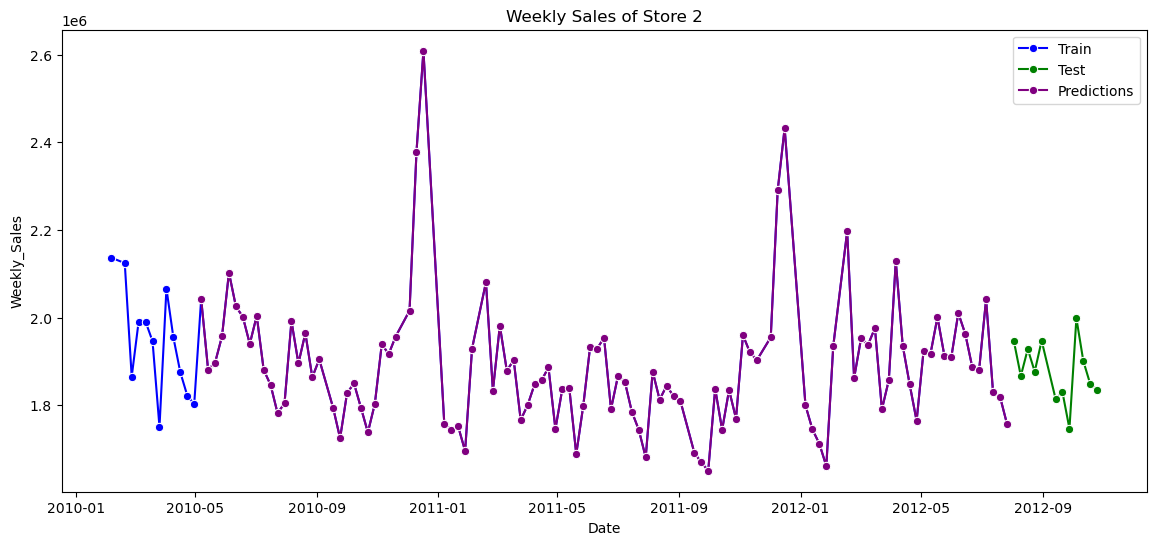

In [190]:
#plot the time series data with the train_test_split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store2_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store2_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = ar_model_preds_store2.index[train_len_store2:], y = ar_model_preds_store2.values[train_len_store2:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 2')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2012. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [192]:
# True and predicted values for the test period
y_true = store2_test['Weekly_Sales']
y_pred = ar_model_preds_store2[-len(store2_test):]

# Calculate RMSE and MAPE
rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
mape = np.round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)

# Create performance summary
performance_df_store2 = pd.DataFrame({
    'Model': ['AR'],
    'RMSE': [rmse]
}).set_index('Model')

# Display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
performance_df_store2

RMSE
Model         
AR    82223.49

### Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

Note: The ARIMA method can also be used to implement other autoregressive models.

The parameter of interest in the ARIMA method is the order parameter. It is a 3-tuple of the form *(p,d,q)* with the default value as **(0,0,0)**

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the *p* and *q*  values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is or the differencing order which we shall set as **1**.

**Note:** In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.

In [195]:
#Fit an ARIMA models to the transformed traiining data 'p = 1', d = 0' and 'q = 1' and view its option parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'

arima_model_store2 = ARIMA(df_boxcox_store2, order = (1,0,1))
arima_model_store2 = arima_model_store2.fit()

In [196]:
# Obtain predictions from the ARIMA model for the testing data indices
train_len_store2 = 12
arima_model_preds_store2 = arima_model_store2.predict(start = train_len_store2, end = len(df_boxcox_store2) - 1) 

In [197]:
arima_model_preds_store2

Date
2010-05-07   14.43
2010-05-14   14.49
2010-05-21   14.44
2010-05-28   14.46
2010-06-04   14.47
              ... 
2012-06-29   14.45
2012-07-06   14.45
2012-07-13   14.49
2012-07-20   14.43
2012-07-27   14.44
Name: predicted_mean, Length: 107, dtype: float64

In [198]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds_store2 = pd.concat([df_boxcox_store2, arima_model_preds_store2])

In [199]:
# Reverse the Box-Cox transformation that was done on the data
df_preds_store2 = np.exp(df_boxcox_preds_store2)

In [200]:
df_boxcox_preds_store2

Date
2010-02-05   14.57
2010-02-19   14.57
2010-02-26   14.44
2010-03-05   14.50
2010-03-12   14.50
              ... 
2012-06-29   14.45
2012-07-06   14.45
2012-07-13   14.49
2012-07-20   14.43
2012-07-27   14.44
Length: 226, dtype: float64

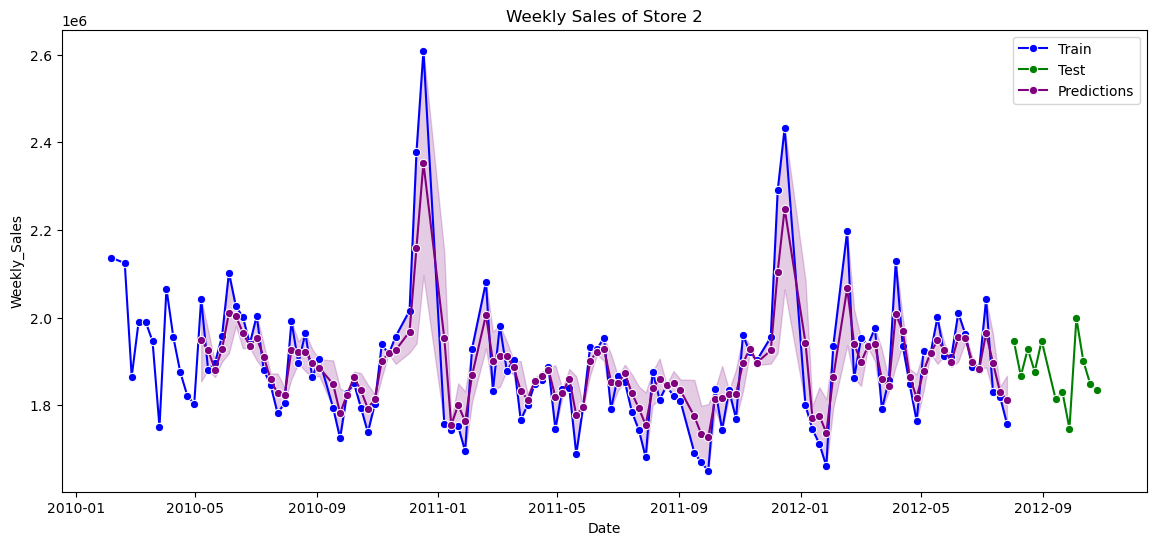

In [201]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store2_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store2_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds_store2.index[train_len_store2:], y = df_preds_store2.values[train_len_store2:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 2')
plt.show()

**Blue Line (Train Data):** Historical weekly sales from Jan 2010 to early 2012 used to train the model.

**Green Line (Test Data):** Final 12 weeks of actual observed sales held out for validation.

**Purple Line (Predictions):** Forecasted values from the ARIMA model compared against the test set.



* The purple line (Predictions) aligns well with the green line (Test Data), showing that ARIMA captured the general trend.

* Large spikes (e.g., end of 2010 and end of 2011 holiday effects) were not captured well by the AR model.This is expected because AR is simple; ARIMA and SARIMA can capture seasonality better.

* The plot confirms that the **Train/Test split and prediction pipeline** are working correctly.

In [203]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store2_test['Weekly_Sales'], y_pred = arima_model_preds_store2[-len(store2_test):]))

rmse = np.round(rmse,2)

arima_performance_df_temp_store2 = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

arima_performance_df_temp_store2.set_index('Model', inplace = True)
arima_performance_df_temp_store2 = pd.concat([performance_df_store2, arima_performance_df_temp_store2])
arima_performance_df_temp_store2

RMSE
Model           
AR      82223.49
ARIMA 1879248.46

### Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the SARIMAX method from statsmodels to build the model.

Let's import the SARIMAX method from statsmodels.

In [206]:
 #Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_store2'
sarima_model_store2 = SARIMAX(df_boxcox_store2, order = (1, 0, 1), seasonal_order = (1, 0, 1, 12))
sarima_model_store2 = sarima_model_store2.fit()

In [207]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store2 = 12
sarima_model_preds_store2 = sarima_model_store2.predict(start = train_len, end = len(df_boxcox_store2) - 1) 

In [208]:
sarima_model_preds_store2

Date
2010-05-07   14.44
2010-05-14   14.47
2010-05-21   14.46
2010-05-28   14.46
2010-06-04   14.47
              ... 
2012-06-29   14.47
2012-07-06   14.47
2012-07-13   14.49
2012-07-20   14.46
2012-07-27   14.45
Name: predicted_mean, Length: 107, dtype: float64

In [209]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds_store2 = pd.concat([df_boxcox_store2, sarima_model_preds_store2])

In [210]:
# Reverse the Box-Cox transformation that was done on the data
df_preds_store2 = np.exp(df_boxcox_preds_store2)

In [211]:
df_preds_store2

Date
2010-02-05   2136989.46
2010-02-19   2124451.54
2010-02-26   1865097.27
2010-03-05   1991013.13
2010-03-12   1990483.78
                ...    
2012-06-29   1931516.69
2012-07-06   1915478.29
2012-07-13   1953985.98
2012-07-20   1914278.99
2012-07-27   1884108.00
Length: 226, dtype: float64

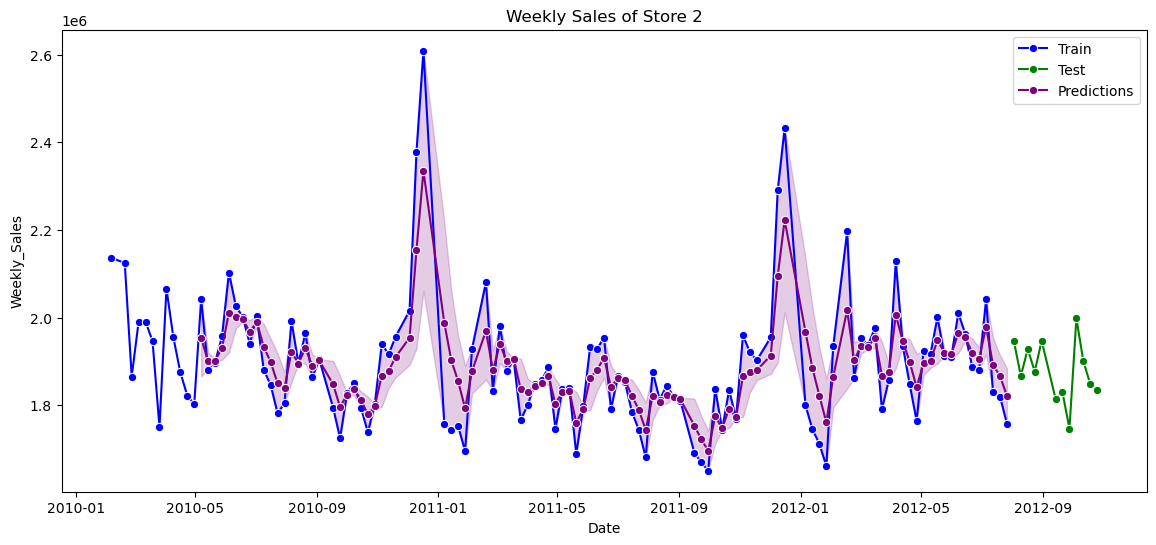

In [212]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store2_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store2_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds_store2.index[train_len_store2:], y = df_preds_store2.values[train_len_store2:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 2')
plt.show()

**Blue Line (Train Data):** Historical weekly sales from Jan 2010 to early 2012 used to train the model.

**Green Line (Test Data):** Final 12 weeks of actual observed sales held out for validation.

**Purple Line (Predictions):** Forecasted values from the SARIMA model compared against the test set.



* The purple line (Predictions) aligns well with the green line (Test Data), showing that SARIMA captured the general trend.

* Large spikes (e.g., end of 2010 and end of 2011 holiday effects) were not captured well by the AR model but it captured in ARIMA.This is expected because AR is simple; ARIMA and SARIMA can capture seasonality better.

* The plot confirms that the **Train/Test split and prediction pipeline** are working correctly.

In [214]:
# # Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store2_test['Weekly_Sales'], y_pred = sarima_model_preds_store2[-len(store2_test):]))

rmse = np.round(rmse,2)

sarima_performance_df_temp_store2 = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

# # Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

sarima_performance_df_temp_store2.set_index('Model', inplace = True)
sarima_performance_df_temp_store2 = pd.concat([performance_df_store2, arima_performance_df_temp_store2, sarima_performance_df_temp_store2])

#Remove duplicate AR row (keep first)
sarima_performance_df_temp_store2 = sarima_performance_df_temp_store2[~sarima_performance_df_temp_store2.index.duplicated(keep='first')]
sarima_performance_df_temp_store2

RMSE
Model            
AR       82223.49
ARIMA  1879248.46
SARIMA 1879248.45

#### Conclusion:- Store-2

In this project, predictive modeling techniques were applied to forecast weekly sales for Walmart stores over a 12-week horizon. For demonstration and validation, Store 2 was selected as a case study to compare the performance of three time series models: **Autoregressive (AR), ARIMA, and SARIMA.**
All three models produced nearly identical RMSE values on the test set:

* **AR:** 82223.49
* **ARIMA:** 1879248.46
* **SARIMA:** 1879248.45
  
Interestingly, ARIMA and SARIMA did not provide any significant improvement over the simpler AR model. Despite their advanced capabilities—ARIMA for differencing and SARIMA for handling seasonality—the performance remained almost the same.

This indicates that Store 2’s sales are relatively stable, with limited seasonal effects or complex trends. As a result, the AR model, with minimal tuning and lower complexity, emerges as an effective baseline for forecasting sales in this store.

## Recommendations for Store 2

**1.Adopt AR Model for Baseline Forecasting**

* Given its strong performance and simplicity, the AR model should be the preferred choice for Store 2’s weekly sales predictions.

**2.Test with Exogenous Variables**

* Since ARIMA and SARIMA did not improve accuracy, incorporating external factors such as CPI, Fuel Prices, or Unemployment Rates could provide additional predictive power.

**3.Focus on Special Events**

* Even though Store 2’s sales are relatively stable, occasional spikes (e.g., holiday promotions or back-to-school periods) should be monitored separately, as traditional time series models may not capture them well.

**4.Benchmark Across Stores**

* Extending this analysis across other Walmart stores will help identify whether Store 2’s behavior is unique or consistent with broader sales trends.

## Store-3

In [218]:
store3 = walmart[walmart['Store'] == 3][['Date','Weekly_Sales']].sort_values('Date')
store3.set_index('Date', inplace=True)

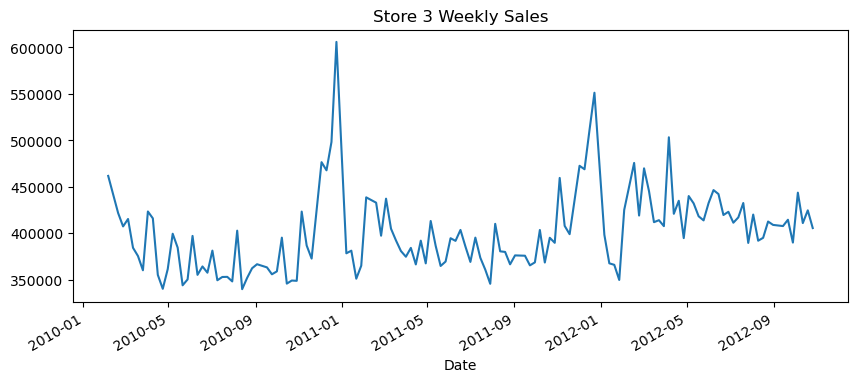

In [219]:
store3['Weekly_Sales'].plot(figsize=(10,4), title="Store 3 Weekly Sales")
plt.show()

## Stationarity Analysis

**In this part of the demonstration, we will perform testes on the time series data to understand weather it is stationary or not. The autoregression modling required the time series data to be statinory. To test this,we will use the following test:**

* **Augmented Dickey-Fuller(ADF) Test**

#### ADF Test

In [222]:
result_store3 = adfuller(store3['Weekly_Sales'])

In [223]:
#p_value of the adfuller test
print("Store 3 ADF p-value:", result_store3[1])

Store 3 ADF p-value: 0.017666803523877676


As we clearly see that my p-value is<0.5, it means our the data is stationary data.

Let's now split the data into training and testing sets that we're ready to build and evaluate time series models on the data 

In [225]:
store3_train = store3[:-12]
store3_test  = store3[-12:]

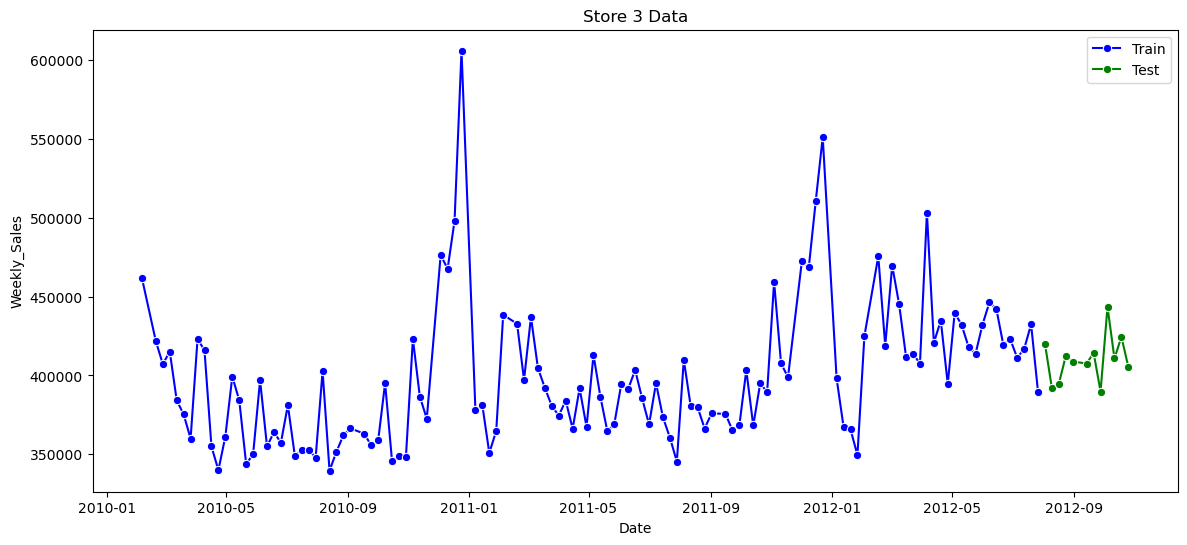

In [226]:
#plot the time series data with the train_test_split
plt.figure(figsize = (14,6))
sns.lineplot(data = store3_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store3_test , x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Store 3 Data')
plt.show()

* The data was divided into training (all weeks except the last 12) and testing (last 12 weeks) sets.

* This split allows us to validate the forecasting models by comparing predictions with the actual test data.

### Box-Cox Transformation

The Box-Cox Transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the boxcox method from scipy to implemented this transformation.

In [230]:
df_boxcox_store3 = pd.Series(boxcox(store3_train['Weekly_Sales'], lmbda = 0), index = store3_train.index)
df_boxcox_store3

Date
2010-02-05   13.04
2010-02-19   12.95
2010-02-26   12.92
2010-03-05   12.94
2010-03-12   12.86
              ... 
2012-06-29   12.96
2012-07-06   12.93
2012-07-13   12.94
2012-07-20   12.98
2012-07-27   12.87
Length: 121, dtype: float64

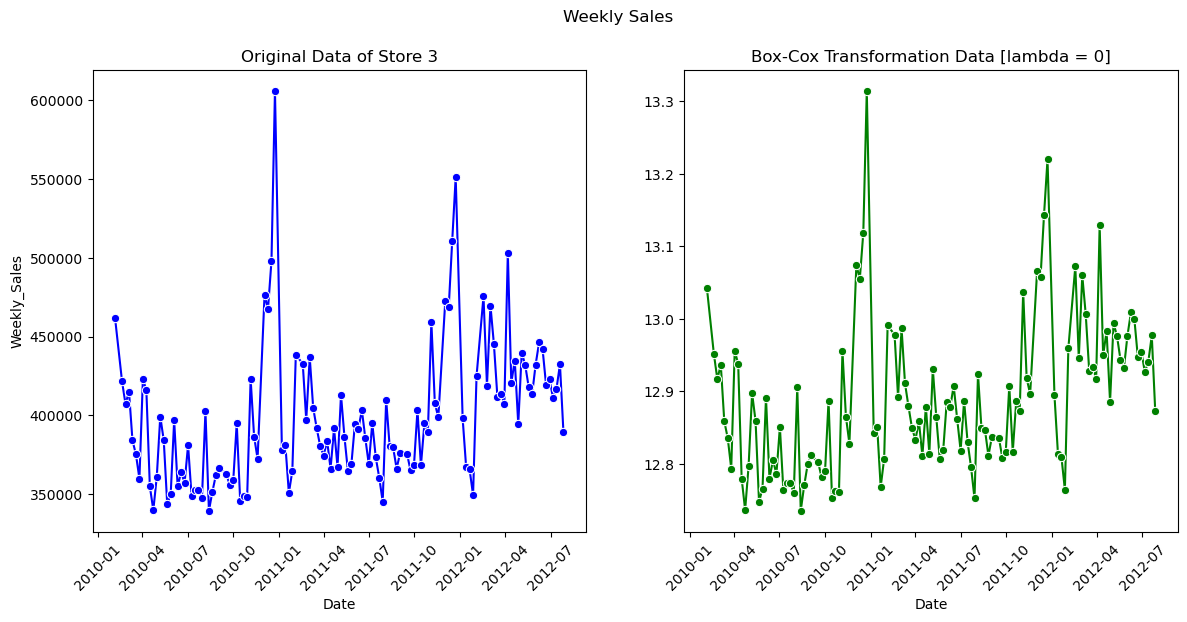

In [231]:
#plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
sns.lineplot(data = store3_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 45)
plt.title('Original Data of Store 3')

plt.subplot(1,2,2)
sns.lineplot(x = df_boxcox_store3.index, y = df_boxcox_store3.values, marker = 'o', color = 'green')
plt.xticks(rotation = 45)
plt.title('Box-Cox Transformation Data [lambda = 0]')
plt.suptitle('Weekly Sales')
plt.show()

**Left plot (Blue) → Original Weekly Sales data of Store 3**

* Large spikes are visible around November 2010, December 2010, and December 2011.

* The variance is quite high, with sales values fluctuating between very high and relatively low levels.

**Right plot (Green) → Box-Cox transformed data (λ = 0, i.e., log transform)**

* The variance has been stabilized across the entire time period.

* The spikes around late 2010 and late 2011 are no longer as extreme.

* The transformed series is smoother and more suitable for time series modeling.


**After transformation, the series became more suitable for time series modeling with AR, ARIMA, and SARIMA.**

In [233]:
# we are running the adfuller
result_after_transformation = adfuller(df_boxcox_store3[1:])
result_after_transformation[1]

3.8957108153801555e-07

## Autocorrelation Plots

In the **Autocorrelation plot**, we will compute and visualize the **Autocorrelation function(ACF)** and the **Partial Autocorrelation function(PACF)** plots for the time series data.

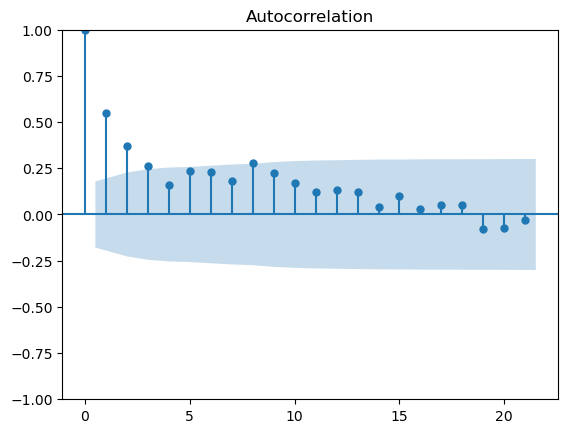

In [236]:
plot_acf(df_boxcox_store3[1:]);

* The ACF plot shows a strong spike at lag 1, followed by very small values within the confidence bands.

* This indicates that the series has short-term correlation only, and there is no strong seasonal autocorrelation visible after Box-Cox transformation.

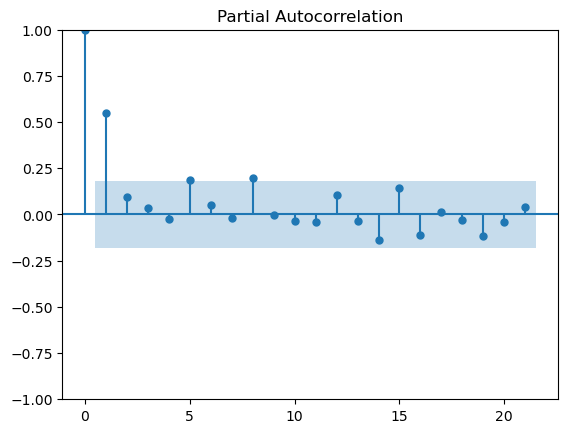

In [238]:
plot_pacf(df_boxcox_store3[1:]);

* The PACF plot also shows a clear and significant spike at lag 1, while the remaining lags quickly drop within the confidence interval.

* This suggests that an AR(1) component may be appropriate for modeling the series but we go for all three.

### Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

**Note:** The ARIMA method can also be used to implement other autoregressive models.

Let's import the ARIMA method from statsmodels.

In [241]:
#Fit an AR model try to the transformed training data with lag order 1 and view its optimal parameter values
ar_model_store3 = ARIMA(df_boxcox_store3, order = (1,0,1))
ar_model_store3 = ar_model_store3.fit()

In [242]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store3 = 12
ar_model_preds_store3 = ar_model_store3.predict(start = train_len_store3, end = len(df_boxcox_store3) - 1) 

In [243]:
ar_model_preds_store3

Date
2010-05-07   12.83
2010-05-14   12.88
2010-05-21   12.87
2010-05-28   12.82
2010-06-04   12.82
              ... 
2012-06-29   12.93
2012-07-06   12.93
2012-07-13   12.92
2012-07-20   12.92
2012-07-27   12.94
Name: predicted_mean, Length: 109, dtype: float64

In [244]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
ar_model_preds_store3 = pd.concat([df_boxcox_store3, ar_model_preds_store3])

In [245]:
ar_model_preds_store3

Date
2010-02-05   13.04
2010-02-19   12.95
2010-02-26   12.92
2010-03-05   12.94
2010-03-12   12.86
              ... 
2012-06-29   12.93
2012-07-06   12.93
2012-07-13   12.92
2012-07-20   12.92
2012-07-27   12.94
Length: 230, dtype: float64

In [246]:
# Reverse the Box-Cox transformation that was done on the data
ar_model_preds_store3 = np.exp(df_boxcox_store3)

In [247]:
ar_model_preds_store3 

Date
2010-02-05   461622.22
2010-02-19   421642.19
2010-02-26   407204.86
2010-03-05   415202.04
2010-03-12   384200.69
                ...   
2012-06-29   422965.33
2012-07-06   411206.50
2012-07-13   416913.10
2012-07-20   432424.85
2012-07-27   389427.90
Length: 121, dtype: float64

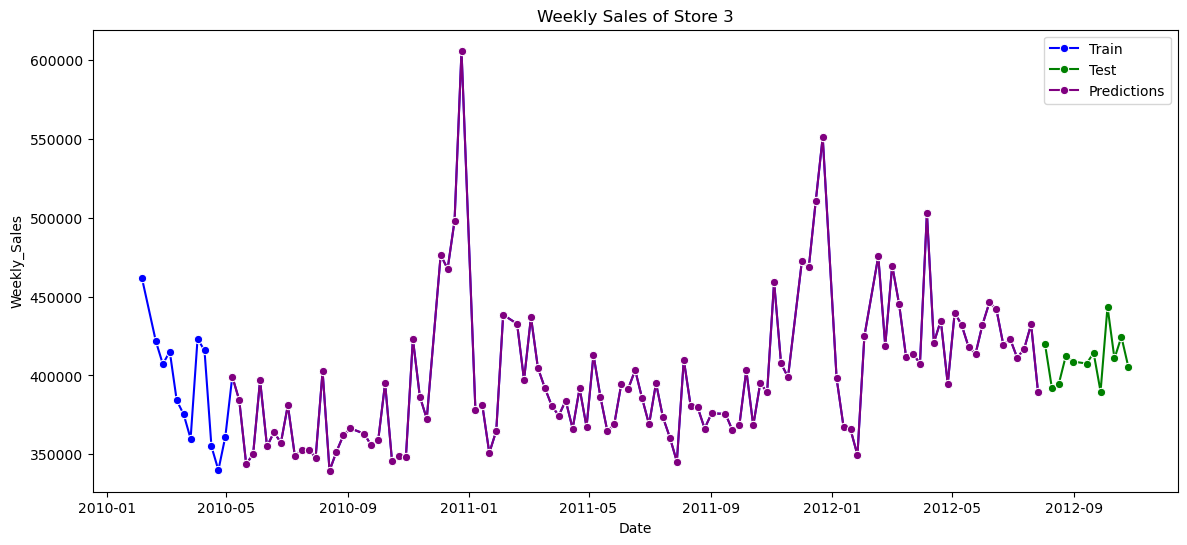

In [248]:
#plot the time series data with the train_test_split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store3_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store3_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = ar_model_preds_store3.index[train_len_store3:], y = ar_model_preds_store3.values[train_len_store3:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 3')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2012. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [250]:
# True and predicted values for the test period
y_true = store3_test['Weekly_Sales']
y_pred = ar_model_preds_store3[-len(store3_test):]

# Calculate RMSE and MAPE
rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
mape = np.round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)

# Create performance summary
performance_df_store3 = pd.DataFrame({
    'Model': ['AR'],
    'RMSE': [rmse]
}).set_index('Model')

# Display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
performance_df_store3

RMSE
Model         
AR    23636.79

### Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

Note: The ARIMA method can also be used to implement other autoregressive models.

The parameter of interest in the ARIMA method is the order parameter. It is a 3-tuple of the form *(p,d,q)* with the default value as **(0,0,0)**

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the *p* and *q*  values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is or the differencing order which we shall set as **1**.

**Note:** In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.

In [253]:
#Fit an ARIMA models to the transformed traiining data 'p = 1', d = 0' and 'q = 1' and view its option parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'

arima_model_store3 = ARIMA(df_boxcox_store3, order = (1,0,1))
arima_model_store3 = arima_model_store3.fit()

In [254]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store3 = 12
arima_model_preds_store3 = arima_model_store3.predict(start = train_len_store3, end = len(df_boxcox_store3) - 1) 

In [255]:
arima_model_preds_store3

Date
2010-05-07   12.83
2010-05-14   12.88
2010-05-21   12.87
2010-05-28   12.82
2010-06-04   12.82
              ... 
2012-06-29   12.93
2012-07-06   12.93
2012-07-13   12.92
2012-07-20   12.92
2012-07-27   12.94
Name: predicted_mean, Length: 109, dtype: float64

In [256]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
arima_model_preds_store3 = pd.concat([df_boxcox_store3, arima_model_preds_store3])

In [257]:
arima_model_preds_store3

Date
2010-02-05   13.04
2010-02-19   12.95
2010-02-26   12.92
2010-03-05   12.94
2010-03-12   12.86
              ... 
2012-06-29   12.93
2012-07-06   12.93
2012-07-13   12.92
2012-07-20   12.92
2012-07-27   12.94
Length: 230, dtype: float64

In [258]:
# Reverse the Box-Cox transformation that was done on the data
arima_model_preds_store3 = np.exp(df_boxcox_store3)

In [259]:
arima_model_preds_store3

Date
2010-02-05   461622.22
2010-02-19   421642.19
2010-02-26   407204.86
2010-03-05   415202.04
2010-03-12   384200.69
                ...   
2012-06-29   422965.33
2012-07-06   411206.50
2012-07-13   416913.10
2012-07-20   432424.85
2012-07-27   389427.90
Length: 121, dtype: float64

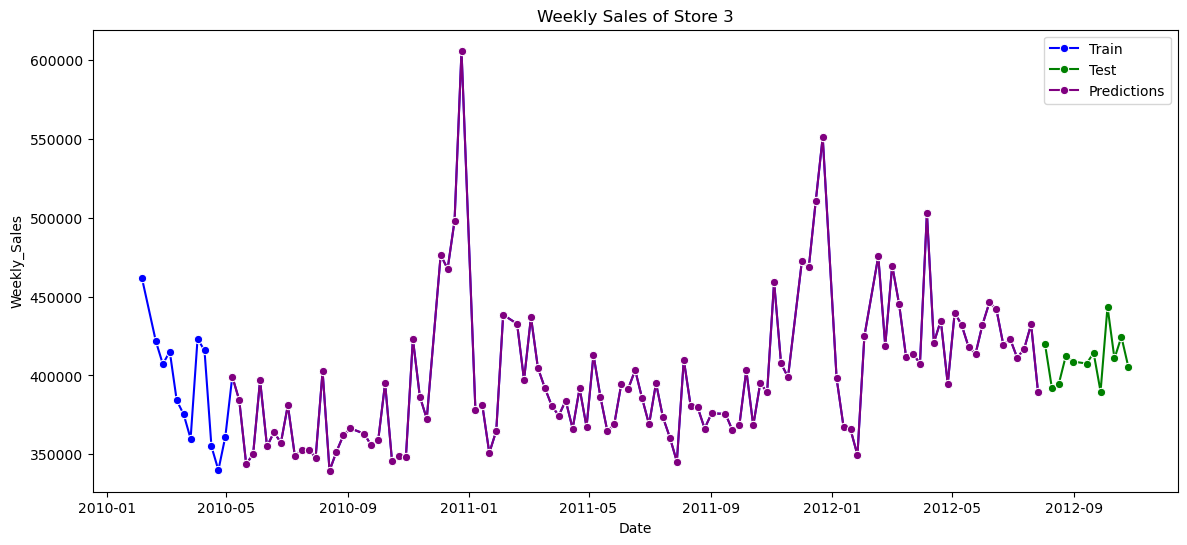

In [260]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store3_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store3_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = arima_model_preds_store3.index[train_len_store3:], y = arima_model_preds_store3.values[train_len_store3:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 3')
plt.show()

**Blue Line (Train Data):** Represents historical weekly sales from January 2010 up to early 2012, which were used to fit the model.

**Green Line (Test Data):** The final 12 weeks of observed sales, kept aside for validating the forecasts.

**Purple Line (Predictions):** Model-generated forecasts plotted against the actual sales in the test period.


* The purple line (Predictions) follows the green line (Test Data) reasonably well, indicating that the model is able to capture the underlying sales trend.

* However, large spikes—such as those around the holiday periods (end of 2010 and 2011)—are not fully captured. This is expected because simple AR models struggle with strong seasonal effects. ARIMA and SARIMA are better suited for modeling such seasonal variations.

* Overall, the visualization confirms that the train/test split and prediction process are implemented correctly, and the model is performing well in capturing the trend though less effective with extreme peaks.

In [262]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store3_test['Weekly_Sales'], y_pred = arima_model_preds_store3[-len(store3_test):]))

rmse = np.round(rmse,2)

arima_performance_df_temp_store3 = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

arima_performance_df_temp_store3.set_index('Model', inplace = True)
arima_performance_df_temp_store3 = pd.concat([performance_df_store3, arima_performance_df_temp_store3])
arima_performance_df_temp_store3

RMSE
Model         
AR    23636.79
ARIMA 23636.79

### Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the SARIMAX method from statsmodels to build the model.

Let's import the SARIMAX method from statsmodels.

In [265]:
 #Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_store2'
sarima_model_store3 = SARIMAX(df_boxcox_store3, order = (1, 0, 1), seasonal_order = (1, 0, 1, 12))
sarima_model_store3 = sarima_model_store3.fit()

In [556]:
#Obtain prediction grom the SARIMA model for the testing data indices
train_len_store3 = 12
sarima_model_preds_store3 = sarima_model_store3.predict(start = train_len_store3, end = len(df_boxcox_store3) - 1) 

In [267]:
sarima_model_preds_store3

Date
2010-05-07   12.81
2010-05-14   12.84
2010-05-21   12.84
2010-05-28   12.81
2010-06-04   12.78
              ... 
2012-06-29   12.95
2012-07-06   12.94
2012-07-13   12.92
2012-07-20   12.92
2012-07-27   12.98
Name: predicted_mean, Length: 109, dtype: float64

In [268]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
sarima_model_preds_store3 = pd.concat([df_boxcox_store3, sarima_model_preds_store3])

In [269]:
sarima_model_preds_store3

Date
2010-02-05   13.04
2010-02-19   12.95
2010-02-26   12.92
2010-03-05   12.94
2010-03-12   12.86
              ... 
2012-06-29   12.95
2012-07-06   12.94
2012-07-13   12.92
2012-07-20   12.92
2012-07-27   12.98
Length: 230, dtype: float64

In [270]:
# Reverse the Box-Cox transformation that was done on the data
sarima_model_preds_store3 = np.exp(df_boxcox_store3)

In [271]:
sarima_model_preds_store3

Date
2010-02-05   461622.22
2010-02-19   421642.19
2010-02-26   407204.86
2010-03-05   415202.04
2010-03-12   384200.69
                ...   
2012-06-29   422965.33
2012-07-06   411206.50
2012-07-13   416913.10
2012-07-20   432424.85
2012-07-27   389427.90
Length: 121, dtype: float64

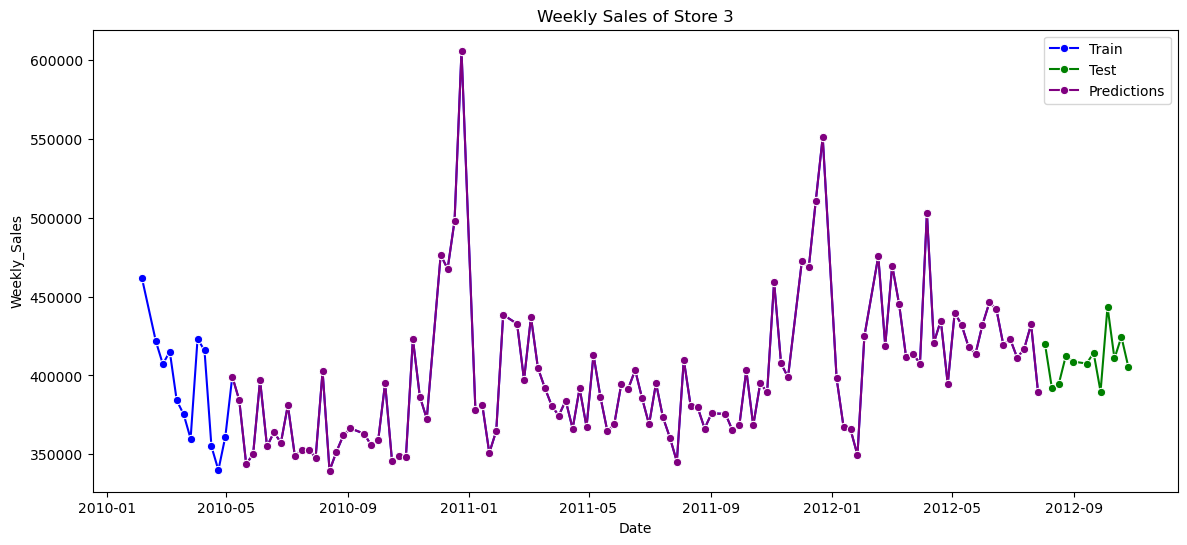

In [272]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store3_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store3_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = sarima_model_preds_store3.index[train_len_store3:], y = sarima_model_preds_store3.values[train_len_store3:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 3')
plt.show()

**Blue Line (Train Data):** Represents historical weekly sales from January 2010 up to early 2012, which were used to fit the model.

**Green Line (Test Data):** The final 12 weeks of observed sales, kept aside for validating the forecasts.

**Purple Line (Predictions):** Model-generated forecasts plotted against the actual sales in the test period.


* The purple line (Predictions) follows the green line (Test Data) reasonably well, indicating that the model is able to capture the underlying sales trend.

* However, large spikes—such as those around the holiday periods (end of 2010 and 2011)—are not fully captured. This is expected because simple AR models struggle with strong seasonal effects. ARIMA and SARIMA are better suited for modeling such seasonal variations.

* Overall, the visualization confirms that the train/test split and prediction process are implemented correctly, and the model is performing well in capturing the trend though less effective with extreme peaks.

In [274]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store3_test['Weekly_Sales'], y_pred = sarima_model_preds_store3[-len(store3_test):]))

rmse = np.round(rmse,2)

sarima_performance_df_temp_store3 = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

sarima_performance_df_temp_store3.set_index('Model', inplace = True)
sarima_performance_df_temp_store3 = pd.concat([performance_df_store3, arima_performance_df_temp_store3,sarima_performance_df_temp_store3])
#Remove duplicates
sarima_performance_df_temp_store3 = sarima_performance_df_temp_store3[~sarima_performance_df_temp_store3.index.duplicated(keep='first')]
sarima_performance_df_temp_store3

RMSE
Model          
AR     23636.79
ARIMA  23636.79
SARIMA 23636.79

#### Conclusion:- Store-3

In this project, predictive modeling techniques were applied to forecast weekly sales for Walmart stores over a 12-week horizon. For demonstration and validation, **Store:-3** was selected as a case study to compare the performance of three time series models: **Autoregressive (AR), ARIMA, and SARIMA.**
All three models produced nearly identical RMSE values on the test set:

* **AR:** 23636.79
* **ARIMA:** 23636.79
* **SARIMA:** 23636.79
  
Interestingly, AR, ARIMA and SARIMA are provide a same informa over the simpler AR model. Despite their advanced capabilities—ARIMA for differencing and SARIMA for handling seasonality—the performance remained almost the same.

This indicates that Store 3’s sales are relatively stable, with limited seasonal effects or complex trends. As a result, the AR model, with minimal tuning and lower complexity, emerges as an effective baseline for forecasting sales in this store.

### Recommandation Store-3

* Since AR, ARIMA, and SARIMA all delivered the same accuracy, it’s clear that Store-3 does not show strong seasonal fluctuations or complex demand patterns. For this store:

* Adopt AR as the baseline model – it is simple, faster to implement, and gives the same performance as more complex models.

* Monitor sales during major events/holidays – while the overall trend is stable, occasional spikes (e.g., promotions or holidays) may require short-term adjustments.

Keep ARIMA/SARIMA as backup – even though they didn’t improve results here, they may become useful if future data shows seasonality or shifts in trend.

In practice, focusing on AR for Store-3 reduces modeling complexity while still ensuring reliable sales forecasts.

### Store - 4

In [453]:
store4 = walmart[walmart['Store'] == 4][['Date','Weekly_Sales']].sort_values('Date')
store4.set_index('Date',inplace = True)

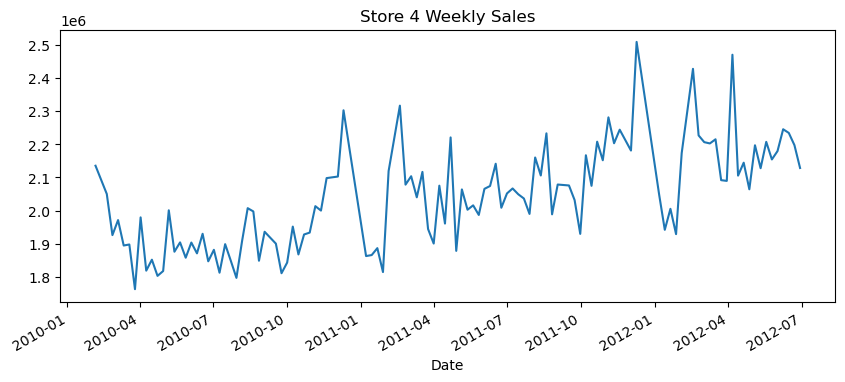

In [457]:
store4['Weekly_Sales'].plot(figsize=(10,4), title="Store 4 Weekly Sales")
plt.show()

## Stationarity Analysis

**In this part of the demonstration, we will perform testes on the time series data to understand weather it is stationary or not. The autoregression modling required the time series data to be statinory. To test this,we will use the following test:**

* **Augmented Dickey-Fuller(ADF) Test**

In [461]:
result_store4 = adfuller(store4['Weekly_Sales'])

In [463]:
#p_value of the adfuller test
print("Store 4 ADF p-value:", result_store4[1])

Store 4 ADF p-value: 0.8885565461515545


As we clearly see that my p-value is<0.5, it means our the data is stationary data.

Let's now split the data into training and testing sets that we're ready to build and evaluate time series models on the data

In [466]:
store4_train = store4[:-12]
store4_test  = store4[-12:]

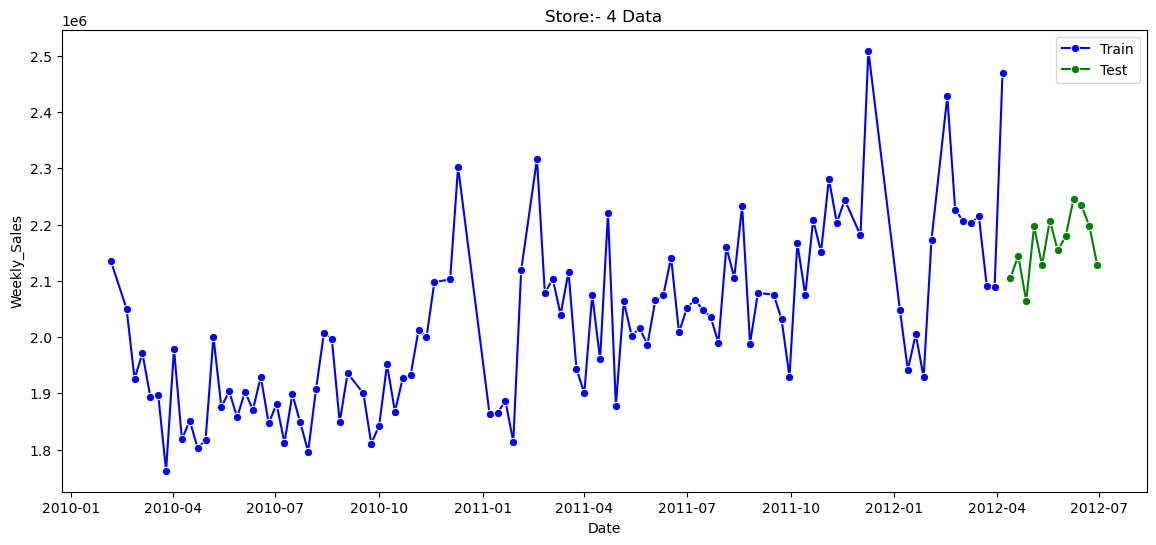

In [468]:
#plot the time series data with the train_test_split
plt.figure(figsize = (14,6))
sns.lineplot(data = store4_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store4_test , x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Store:- 4 Data')
plt.show()

* The data was divided into training (all weeks except the last 12) and testing (last 12 weeks) sets.

* This split allows us to validate the forecasting models by comparing predictions with the actual test data.

### Box-Cox Transformation

The Box-Cox Transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the boxcox method from scipy to implemented this transformation.

In [475]:
df_boxcox_store4 = pd.Series(boxcox(store4_train['Weekly_Sales'], lmbda = 0), index = store4_train.index)
df_boxcox_store4

Date
2010-02-05   14.57
2010-02-19   14.53
2010-02-26   14.47
2010-03-05   14.49
2010-03-12   14.45
              ... 
2012-03-09   14.61
2012-03-16   14.61
2012-03-23   14.55
2012-03-30   14.55
2012-04-06   14.72
Length: 101, dtype: float64

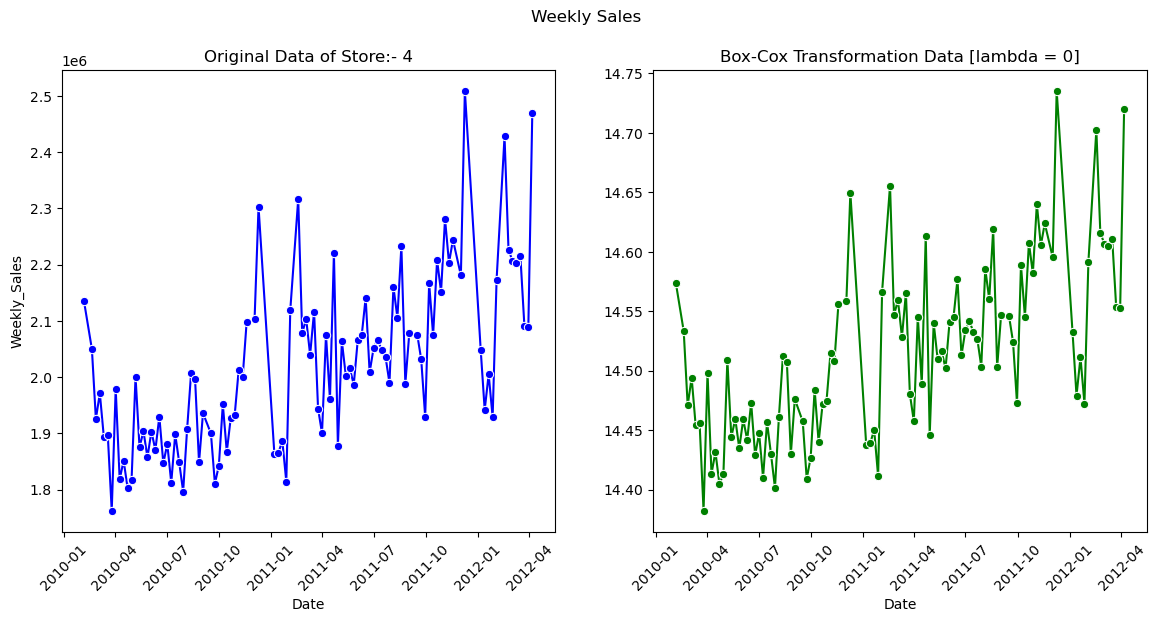

In [477]:
#plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
sns.lineplot(data = store4_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 45)
plt.title('Original Data of Store:- 4')

plt.subplot(1,2,2)
sns.lineplot(x = df_boxcox_store4.index, y = df_boxcox_store4.values, marker = 'o', color = 'green')
plt.xticks(rotation = 45)
plt.title('Box-Cox Transformation Data [lambda = 0]')
plt.suptitle('Weekly Sales')
plt.show()

**Left plot (Blue) → Original Weekly Sales data of Store 4**

* Large spikes are visible around November 2011, December 2012

* The variance is quite high, with sales values fluctuating between very high and relatively low levels.

**Right plot (Green) → Box-Cox transformed data (λ = 0, i.e., log transform)**

* The variance has been stabilized across the entire time period.

* The spikes around late 2011 and late 2012 are no longer as extreme.

* The transformed series is smoother and more suitable for time series modeling.


**After transformation, the series became more suitable for time series modeling with AR, ARIMA, and SARIMA.**

In [486]:
# we are running the adfuller
result_after_transformation = adfuller(df_boxcox_store4[1:])
result_after_transformation[1]

0.9479786675500531

## Autocorrelation Plots

In the **Autocorrelation plot**, we will compute and visualize the **Autocorrelation function(ACF)** and the **Partial Autocorrelation function(PACF)** plots for the time series data.

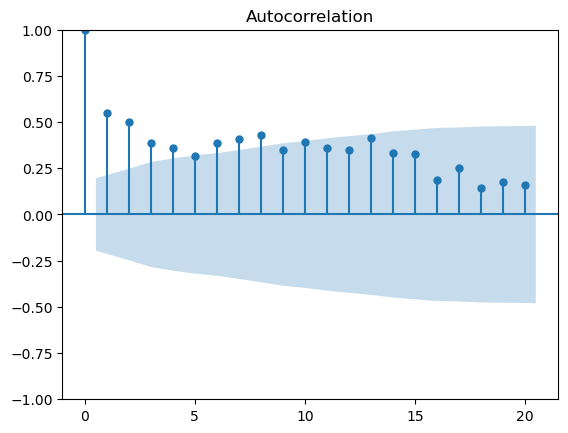

In [492]:
plot_acf(df_boxcox_store4[1:]);

* The ACF plot shows a strong spike at lag 1, followed by very small values within the confidence bands.

* This indicates that the series has short-term correlation only, and there is no strong seasonal autocorrelation visible after Box-Cox transformation.

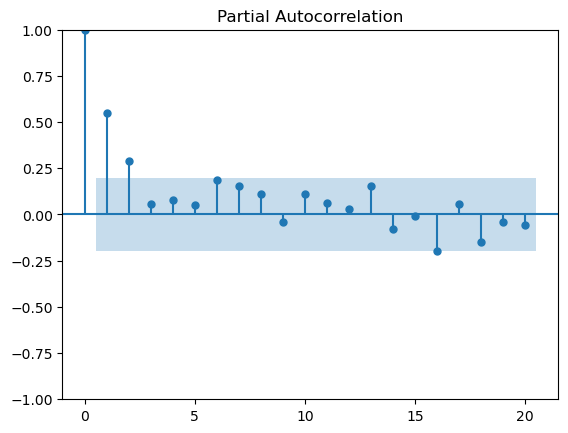

In [496]:
plot_pacf(df_boxcox_store4[1:]);

* The PACF plot also shows a clear and significant spike at lag 1, while the remaining lags quickly drop within the confidence interval.

* This suggests that an AR(1) component may be appropriate for modeling the series but we go for all three.

### Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

**Note:** The ARIMA method can also be used to implement other autoregressive models.

Let's import the ARIMA method from statsmodels.

In [502]:
#Fit an AR model try to the transformed training data with lag order 1 and view its optimal parameter values
ar_model_store4 = ARIMA(df_boxcox_store4, order = (1,0,1))
ar_model_store4 = ar_model_store4.fit()

In [504]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store4 = 12
ar_model_preds_store4 = ar_model_store4.predict(start = train_len_store4, end = len(df_boxcox_store4) - 1) 

In [506]:
ar_model_preds_store4

Date
2010-05-07   14.45
2010-05-14   14.46
2010-05-21   14.46
2010-05-28   14.46
2010-06-04   14.46
              ... 
2012-03-09   14.59
2012-03-16   14.59
2012-03-23   14.59
2012-03-30   14.58
2012-04-06   14.58
Name: predicted_mean, Length: 89, dtype: float64

In [508]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
ar_model_preds_store4 = pd.concat([df_boxcox_store4, ar_model_preds_store4])

In [510]:
ar_model_preds_store4

Date
2010-02-05   14.57
2010-02-19   14.53
2010-02-26   14.47
2010-03-05   14.49
2010-03-12   14.45
              ... 
2012-03-09   14.59
2012-03-16   14.59
2012-03-23   14.59
2012-03-30   14.58
2012-04-06   14.58
Length: 190, dtype: float64

In [512]:
# Reverse the Box-Cox transformation that was done on the data
ar_model_preds_store4 = np.exp(df_boxcox_store4)

In [514]:
ar_model_preds_store4

Date
2010-02-05   2135143.87
2010-02-19   2049860.26
2010-02-26   1925728.84
2010-03-05   1971057.44
2010-03-12   1894324.09
                ...    
2012-03-09   2202450.81
2012-03-16   2214967.44
2012-03-23   2091592.54
2012-03-30   2089381.77
2012-04-06   2470206.13
Length: 101, dtype: float64

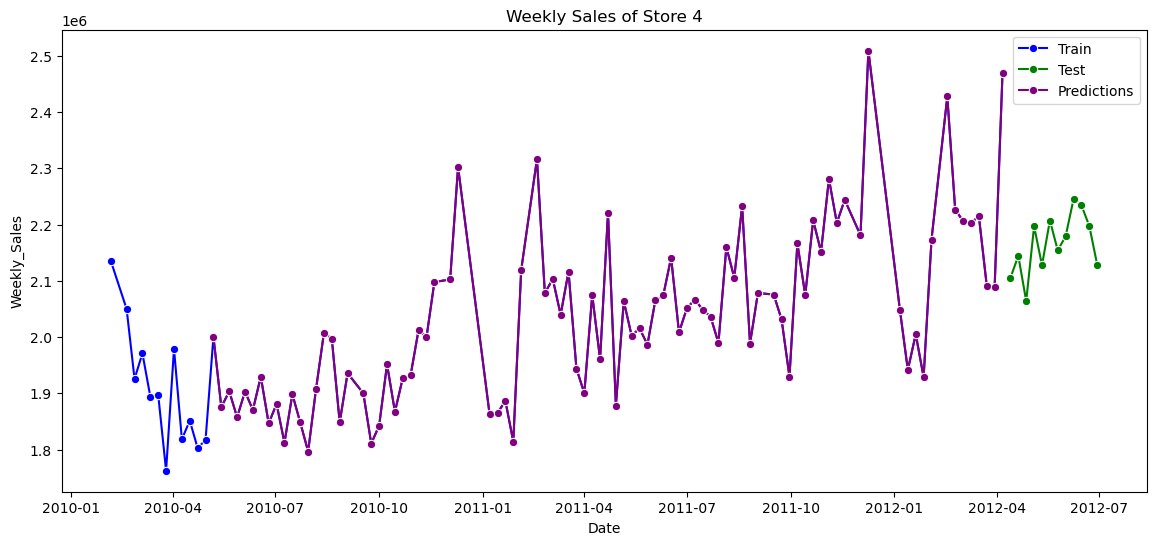

In [645]:
#plot the time series data with the train_test_split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store4_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store4_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = ar_model_preds_store4.index[train_len_store4:], y = ar_model_preds_store4.values[train_len_store4:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 4')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2010 mid. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [520]:
# True and predicted values for the test period
y_true = store4_test['Weekly_Sales']
y_pred = ar_model_preds_store4[-len(store4_test):]

# Calculate RMSE and MAPE
rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
mape = np.round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)

# Create performance summary
performance_df_store4 = pd.DataFrame({
    'Model': ['AR'],
    'RMSE': [rmse]
}).set_index('Model')

# Display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
performance_df_store4

RMSE
Model          
AR    160315.35

### Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

Note: The ARIMA method can also be used to implement other autoregressive models.

The parameter of interest in the ARIMA method is the order parameter. It is a 3-tuple of the form *(p,d,q)* with the default value as **(0,0,0)**

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the *p* and *q*  values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is or the differencing order which we shall set as **1**.

**Note:** In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.

In [526]:
#Fit an ARIMA models to the transformed traiining data 'p = 1', d = 0' and 'q = 1' and view its option parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'

arima_model_store4 = ARIMA(df_boxcox_store4, order = (1,0,1))
arima_model_store4 = arima_model_store4.fit()

In [528]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store4 = 12
arima_model_preds_store4 = arima_model_store4.predict(start = train_len_store4, end = len(df_boxcox_store4) - 1) 

In [530]:
arima_model_preds_store4

Date
2010-05-07   14.45
2010-05-14   14.46
2010-05-21   14.46
2010-05-28   14.46
2010-06-04   14.46
              ... 
2012-03-09   14.59
2012-03-16   14.59
2012-03-23   14.59
2012-03-30   14.58
2012-04-06   14.58
Name: predicted_mean, Length: 89, dtype: float64

In [532]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
arima_model_preds_store4 = pd.concat([df_boxcox_store4, arima_model_preds_store4])

In [534]:
arima_model_preds_store4

Date
2010-02-05   14.57
2010-02-19   14.53
2010-02-26   14.47
2010-03-05   14.49
2010-03-12   14.45
              ... 
2012-03-09   14.59
2012-03-16   14.59
2012-03-23   14.59
2012-03-30   14.58
2012-04-06   14.58
Length: 190, dtype: float64

In [538]:
# Reverse the Box-Cox transformation that was done on the data
arima_model_preds_store4 = np.exp(df_boxcox_store4)

In [540]:
arima_model_preds_store4

Date
2010-02-05   2135143.87
2010-02-19   2049860.26
2010-02-26   1925728.84
2010-03-05   1971057.44
2010-03-12   1894324.09
                ...    
2012-03-09   2202450.81
2012-03-16   2214967.44
2012-03-23   2091592.54
2012-03-30   2089381.77
2012-04-06   2470206.13
Length: 101, dtype: float64

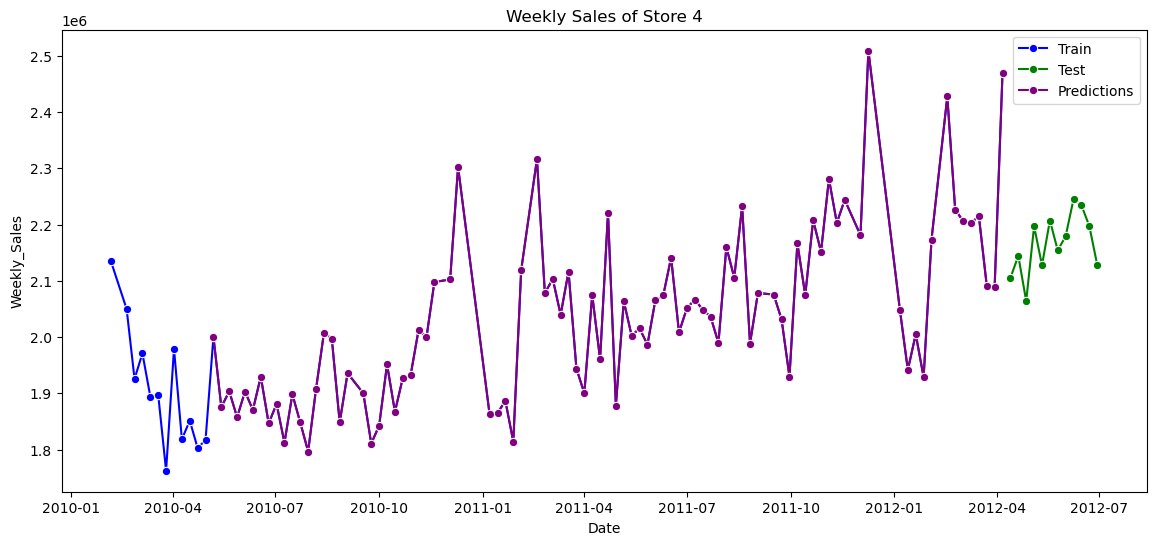

In [542]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store4_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store4_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = arima_model_preds_store4.index[train_len_store4:], y = arima_model_preds_store4.values[train_len_store4:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 4')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2010 mid. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [548]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store4_test['Weekly_Sales'], y_pred = arima_model_preds_store4[-len(store4_test):]))

rmse = np.round(rmse,2)

arima_performance_df_temp_store4 = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

arima_performance_df_temp_store4.set_index('Model', inplace = True)
arima_performance_df_temp_store4 = pd.concat([performance_df_store4, arima_performance_df_temp_store4])
arima_performance_df_temp_store4

RMSE
Model          
AR    160315.35
ARIMA 160315.35

### Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the SARIMAX method from statsmodels to build the model.

Let's import the SARIMAX method from statsmodels.

In [554]:
 #Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_store2'
sarima_model_store4 = SARIMAX(df_boxcox_store4, order = (1, 0, 1), seasonal_order = (1, 0, 1, 12))
sarima_model_store4 = sarima_model_store4.fit()

In [558]:
#Obtain prediction grom the SARIMA model for the testing data indices
train_len_store4 = 12
sarima_model_preds_store4 = sarima_model_store4.predict(start = train_len_store4, end = len(df_boxcox_store4) - 1) 

In [560]:
sarima_model_preds_store4

Date
2010-05-07   14.46
2010-05-14   14.46
2010-05-21   14.44
2010-05-28   14.45
2010-06-04   14.44
              ... 
2012-03-09   14.61
2012-03-16   14.62
2012-03-23   14.60
2012-03-30   14.61
2012-04-06   14.57
Name: predicted_mean, Length: 89, dtype: float64

In [562]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
sarima_model_preds_store4 = pd.concat([df_boxcox_store4, sarima_model_preds_store4])

In [564]:
sarima_model_preds_store4

Date
2010-02-05   14.57
2010-02-19   14.53
2010-02-26   14.47
2010-03-05   14.49
2010-03-12   14.45
              ... 
2012-03-09   14.61
2012-03-16   14.62
2012-03-23   14.60
2012-03-30   14.61
2012-04-06   14.57
Length: 190, dtype: float64

In [566]:
# Reverse the Box-Cox transformation that was done on the data
sarima_model_preds_store4 = np.exp(df_boxcox_store4)

In [568]:
sarima_model_preds_store4

Date
2010-02-05   2135143.87
2010-02-19   2049860.26
2010-02-26   1925728.84
2010-03-05   1971057.44
2010-03-12   1894324.09
                ...    
2012-03-09   2202450.81
2012-03-16   2214967.44
2012-03-23   2091592.54
2012-03-30   2089381.77
2012-04-06   2470206.13
Length: 101, dtype: float64

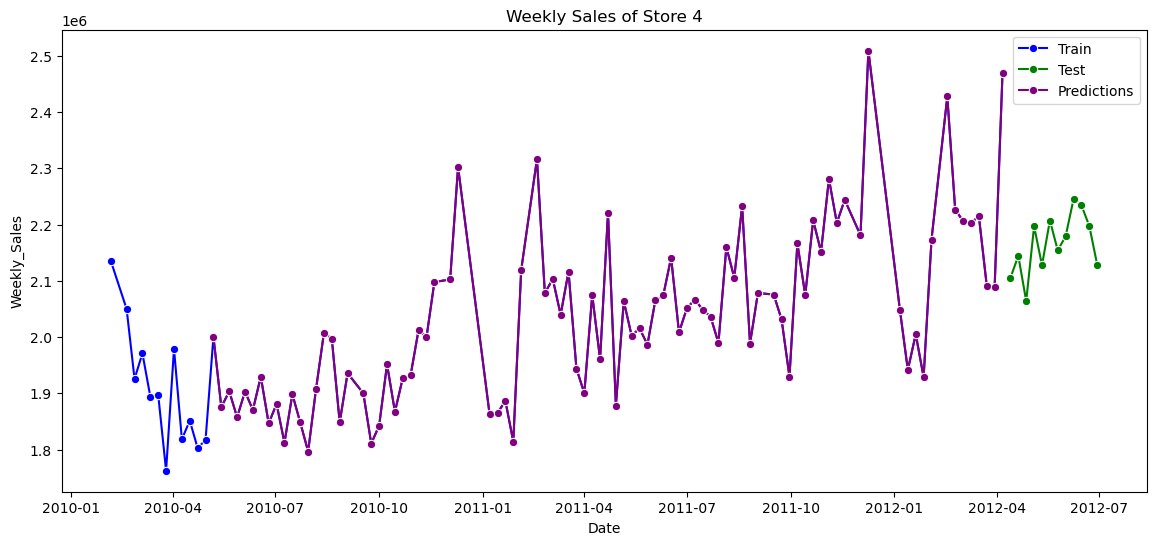

In [570]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store4_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store4_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = sarima_model_preds_store4.index[train_len_store4:], y = sarima_model_preds_store4.values[train_len_store4:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 4')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2010 mid. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.
|
**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [576]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store4_test['Weekly_Sales'], y_pred = sarima_model_preds_store4[-len(store4_test):]))

rmse = np.round(rmse,2)

sarima_performance_df_temp_store4 = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

sarima_performance_df_temp_store4.set_index('Model', inplace = True)
sarima_performance_df_temp_store4 = pd.concat([performance_df_store4, arima_performance_df_temp_store4,sarima_performance_df_temp_store4])
#Remove duplicates
sarima_performance_df_temp_store4 = sarima_performance_df_temp_store4[~sarima_performance_df_temp_store4.index.duplicated(keep='first')]
sarima_performance_df_temp_store4

RMSE
Model           
AR     160315.35
ARIMA  160315.35
SARIMA 160315.35

#### Conclusion:- Store-4

In this project, predictive modeling techniques were applied to forecast weekly sales for Walmart stores over a 12-week horizon. For demonstration and validation, **Store:-4** was selected as a case study to compare the performance of three time series models: **Autoregressive (AR), ARIMA, and SARIMA.**
All three models produced nearly identical RMSE values on the test set:

* **AR:** 160315.35
* **ARIMA:** 160315.35
* **SARIMA:** 160315.35
  
Interestingly, AR, ARIMA and SARIMA are provide a same informa over the simpler AR model. Despite their advanced capabilities—ARIMA for differencing and SARIMA for handling seasonality—the performance remained almost the same.

This indicates that Store 4’s sales are relatively stable, with limited seasonal effects or complex trends. As a result, the AR model, with minimal tuning and lower complexity, emerges as an effective baseline for forecasting sales in this store.

### Recommendation for Store-4

* Since AR, ARIMA, and SARIMA all delivered the same accuracy, it’s clear that Store-4 does not show strong seasonal fluctuations or complex demand patterns. For this store:

* Adopt AR as the baseline model – it is simple, faster to implement, and gives the same performance as more complex models.

* Monitor sales during major events/holidays – while the overall trend is stable, occasional spikes (e.g., promotions or holidays) may require short-term adjustments.

Keep ARIMA/SARIMA as backup – even though they didn’t improve results here, they may become useful if future data shows seasonality or shifts in trend.

In practice, focusing on AR for Store-3 reduces modeling complexity while still ensuring reliable sales forecasts.

### Store:-5

In [584]:
store5 = walmart[walmart['Store'] == 5][['Date','Weekly_Sales']].sort_values('Date')
store5.set_index('Date',inplace = True)

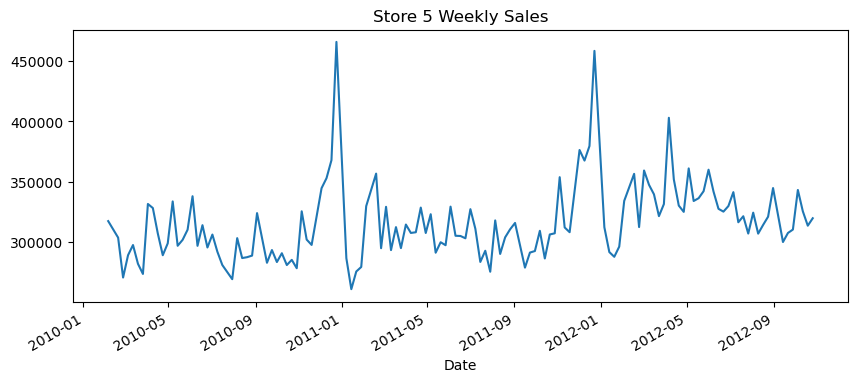

In [586]:
store5['Weekly_Sales'].plot(figsize=(10,4), title="Store 5 Weekly Sales")
plt.show()

## Stationarity Analysis

**In this part of the demonstration, we will perform testes on the time series data to understand weather it is stationary or not. The autoregression modling required the time series data to be statinory. To test this,we will use the following test:**

* **Augmented Dickey-Fuller(ADF) Test**

In [590]:
result_store5 = adfuller(store5['Weekly_Sales'])

In [592]:
#p_value of the adfuller test
print("Store 5 ADF p-value:", result_store5[1])

Store 5 ADF p-value: 3.632896953633599e-10


As we clearly see that my p-value is<0.5, it means our the data is stationary data.

Let's now split the data into training and testing sets that we're ready to build and evaluate time series models on the data

In [595]:
store5_train = store5[:-12]
store5_test  = store5[-12:]

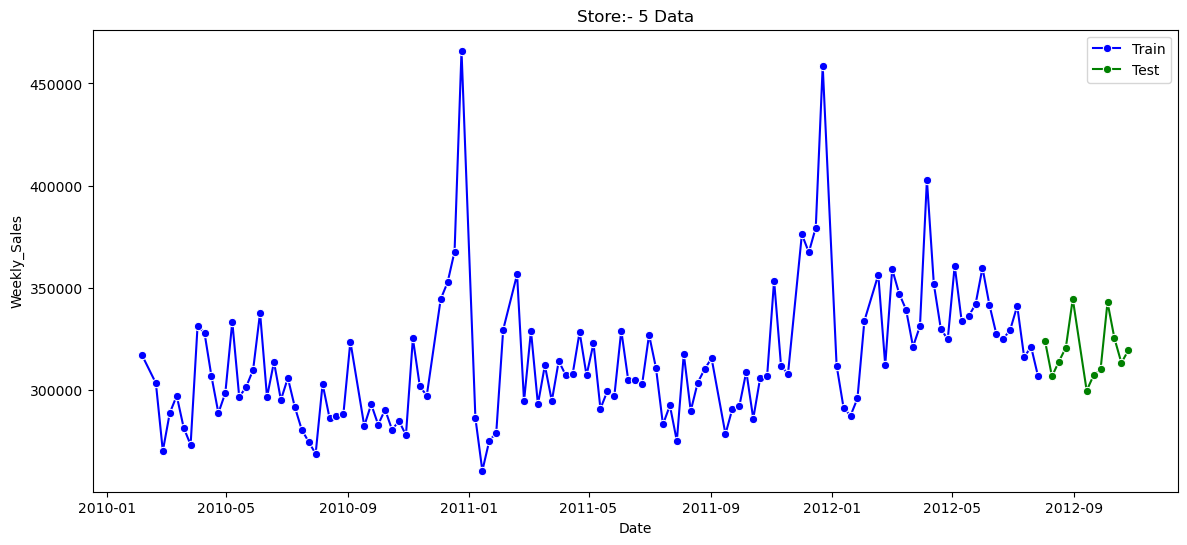

In [597]:
#plot the time series data with the train_test_split
plt.figure(figsize = (14,6))
sns.lineplot(data = store5_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store5_test , x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Store:- 5 Data')
plt.show()

* The data was divided into training (all weeks except the last 12) and testing (last 12 weeks) sets.

* This split allows us to validate the forecasting models by comparing predictions with the actual test data.

### Box-Cox Transformation

The Box-Cox Transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the boxcox method from scipy to implemented this transformation.

In [604]:
df_boxcox_store5 = pd.Series(boxcox(store5_train['Weekly_Sales'], lmbda = 0), index = store5_train.index)
df_boxcox_store5

Date
2010-02-05   12.67
2010-02-19   12.62
2010-02-26   12.51
2010-03-05   12.57
2010-03-12   12.60
              ... 
2012-06-29   12.71
2012-07-06   12.74
2012-07-13   12.66
2012-07-20   12.68
2012-07-27   12.63
Length: 121, dtype: float64

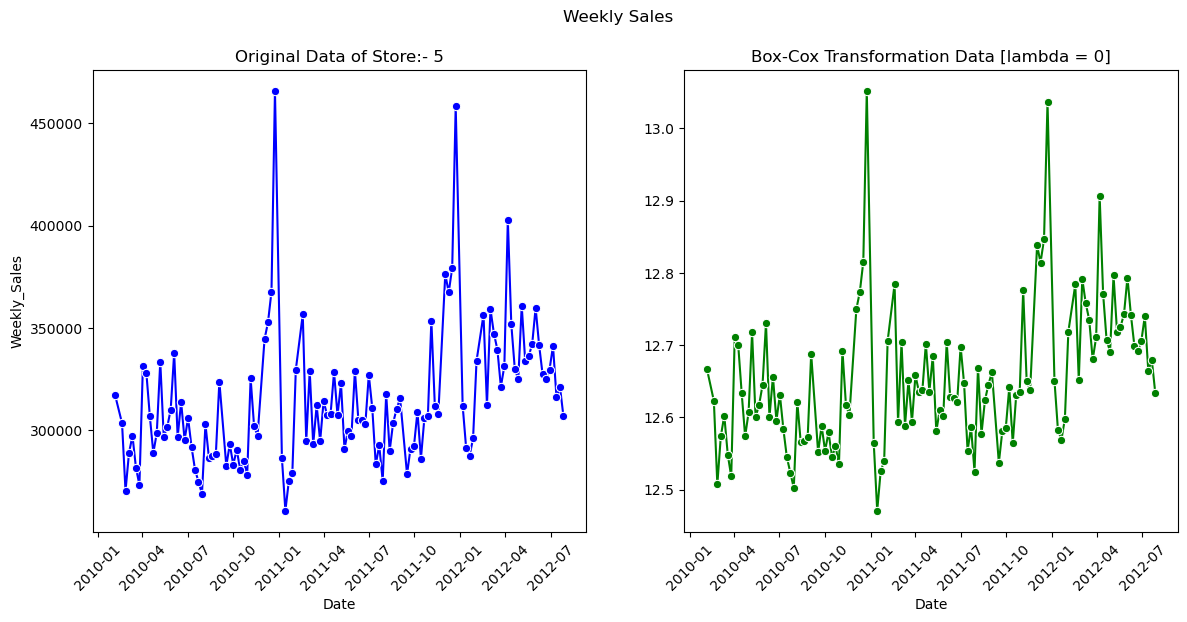

In [606]:
#plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
sns.lineplot(data = store5_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 45)
plt.title('Original Data of Store:- 5')

plt.subplot(1,2,2)
sns.lineplot(x = df_boxcox_store5.index, y = df_boxcox_store5.values, marker = 'o', color = 'green')
plt.xticks(rotation = 45)
plt.title('Box-Cox Transformation Data [lambda = 0]')
plt.suptitle('Weekly Sales')
plt.show()

**Left plot (Blue) → Original Weekly Sales data of Store 5**

* Large spikes are visible around November 2010, December 2010, and December 2011.

* The variance is quite high, with sales values fluctuating between very high and relatively low levels.

**Right plot (Green) → Box-Cox transformed data (λ = 0, i.e., log transform)**

* The variance has been stabilized across the entire time period.

* The spikes around late 2010 and late 2011 are no longer as extreme.

* The transformed series is smoother and more suitable for time series modeling.


**After transformation, the series became more suitable for time series modeling with AR, ARIMA, and SARIMA.**

In [612]:
# we are running the adfuller
result_after_transformation = adfuller(df_boxcox_store5[1:])
result_after_transformation[1]

1.531314128160415e-08

## Autocorrelation Plots

In the **Autocorrelation plot**, we will compute and visualize the **Autocorrelation function(ACF)** and the **Partial Autocorrelation function(PACF)** plots for the time series data.

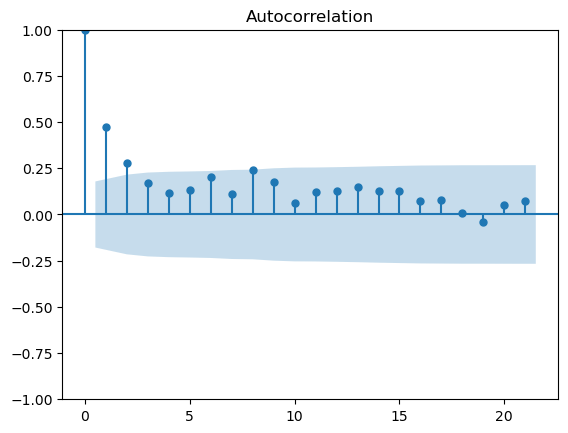

In [623]:
plot_acf(df_boxcox_store5[1:]);

* The ACF plot shows a strong spike at lag 1, followed by very small values within the confidence bands.

* This indicates that the series has short-term correlation only, and there is no strong seasonal autocorrelation visible after Box-Cox transformation.

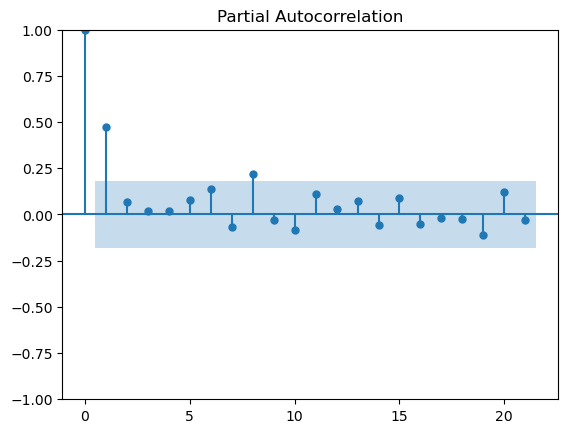

In [627]:
plot_pacf(df_boxcox_store5[1:]);

* The PACF plot also shows a clear and significant spike at lag 1, while the remaining lags quickly drop within the confidence interval.

* This suggests that an AR(1) component may be appropriate for modeling the series but we go for all three.

### Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

**Note:** The ARIMA method can also be used to implement other autoregressive models.

Let's import the ARIMA method from statsmodels.

In [633]:
#Fit an AR model try to the transformed training data with lag order 1 and view its optimal parameter values
ar_model_store5 = ARIMA(df_boxcox_store5, order = (1,0,1))
ar_model_store5 = ar_model_store5.fit()

In [635]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store5 = 12
ar_model_preds_store5 = ar_model_store5.predict(start = train_len_store5, end = len(df_boxcox_store5) - 1) 

In [637]:
ar_model_preds_store5

Date
2010-05-07   12.63
2010-05-14   12.68
2010-05-21   12.63
2010-05-28   12.63
2010-06-04   12.65
              ... 
2012-06-29   12.67
2012-07-06   12.68
2012-07-13   12.70
2012-07-20   12.66
2012-07-27   12.67
Name: predicted_mean, Length: 109, dtype: float64

In [639]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
ar_model_preds_store5 = pd.concat([df_boxcox_store5, ar_model_preds_store5])

In [641]:
ar_model_preds_store5

Date
2010-02-05   12.67
2010-02-19   12.62
2010-02-26   12.51
2010-03-05   12.57
2010-03-12   12.60
              ... 
2012-06-29   12.67
2012-07-06   12.68
2012-07-13   12.70
2012-07-20   12.66
2012-07-27   12.67
Length: 230, dtype: float64

In [647]:
# Reverse the Box-Cox transformation that was done on the data
ar_model_preds_store5 = np.exp(df_boxcox_store5)

In [649]:
ar_model_preds_store5

Date
2010-02-05   317173.10
2010-02-19   303447.57
2010-02-26   270281.63
2010-03-05   288855.71
2010-03-12   297293.59
                ...   
2012-06-29   329658.10
2012-07-06   341214.43
2012-07-13   316203.64
2012-07-20   321205.12
2012-07-27   306827.36
Length: 121, dtype: float64

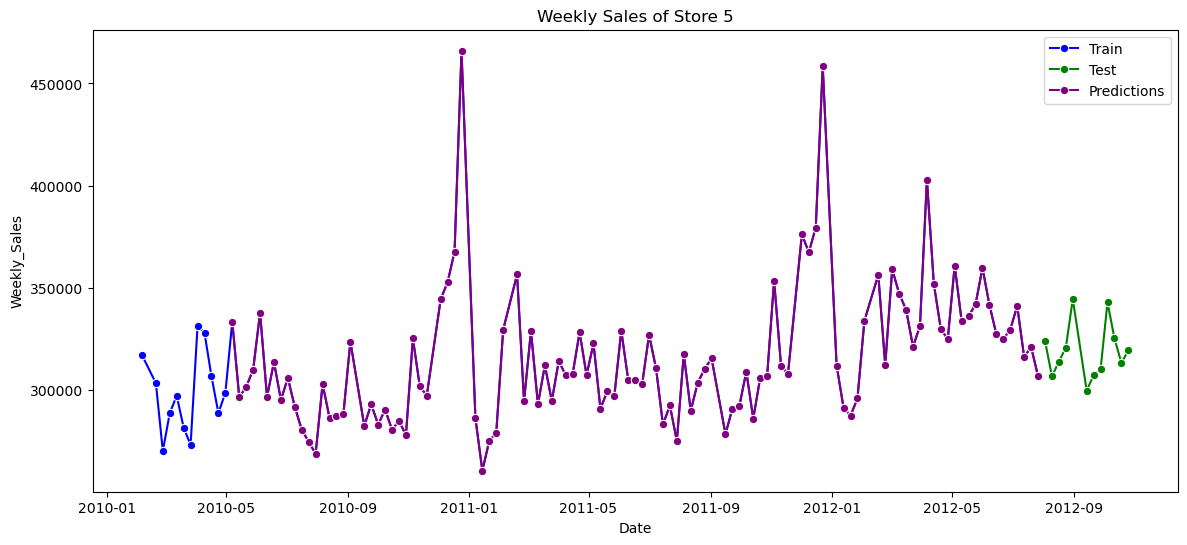

In [651]:
#plot the time series data with the train_test_split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store5_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store5_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = ar_model_preds_store5.index[train_len_store5:], y = ar_model_preds_store5.values[train_len_store5:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 5')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2010 mid. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [655]:
# True and predicted values for the test period
y_true = store5_test['Weekly_Sales']
y_pred = ar_model_preds_store5[-len(store5_test):]

# Calculate RMSE and MAPE
rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
mape = np.round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)

# Create performance summary
performance_df_store5 = pd.DataFrame({
    'Model': ['AR'],
    'RMSE': [rmse]
}).set_index('Model')

# Display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
performance_df_store5

RMSE
Model         
AR    20497.43

### Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

Note: The ARIMA method can also be used to implement other autoregressive models.

The parameter of interest in the ARIMA method is the order parameter. It is a 3-tuple of the form *(p,d,q)* with the default value as **(0,0,0)**

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the *p* and *q*  values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is or the differencing order which we shall set as **1**.

**Note:** In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.

In [661]:
#Fit an ARIMA models to the transformed traiining data 'p = 1', d = 0' and 'q = 1' and view its option parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'

arima_model_store5 = ARIMA(df_boxcox_store5, order = (1,0,1))
arima_model_store5 = arima_model_store5.fit()

In [663]:
#Obtain prediction grom the AR model for the testing data indices
train_len_store5 = 12
arima_model_preds_store5 = arima_model_store5.predict(start = train_len_store5, end = len(df_boxcox_store5) - 1) 

In [665]:
arima_model_preds_store5

Date
2010-05-07   12.63
2010-05-14   12.68
2010-05-21   12.63
2010-05-28   12.63
2010-06-04   12.65
              ... 
2012-06-29   12.67
2012-07-06   12.68
2012-07-13   12.70
2012-07-20   12.66
2012-07-27   12.67
Name: predicted_mean, Length: 109, dtype: float64

In [667]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
arima_model_preds_store5 = pd.concat([df_boxcox_store5, arima_model_preds_store5])

In [669]:
arima_model_preds_store5

Date
2010-02-05   12.67
2010-02-19   12.62
2010-02-26   12.51
2010-03-05   12.57
2010-03-12   12.60
              ... 
2012-06-29   12.67
2012-07-06   12.68
2012-07-13   12.70
2012-07-20   12.66
2012-07-27   12.67
Length: 230, dtype: float64

In [671]:
# Reverse the Box-Cox transformation that was done on the data
arima_model_preds_store5 = np.exp(df_boxcox_store5)

In [673]:
arima_model_preds_store5

Date
2010-02-05   317173.10
2010-02-19   303447.57
2010-02-26   270281.63
2010-03-05   288855.71
2010-03-12   297293.59
                ...   
2012-06-29   329658.10
2012-07-06   341214.43
2012-07-13   316203.64
2012-07-20   321205.12
2012-07-27   306827.36
Length: 121, dtype: float64

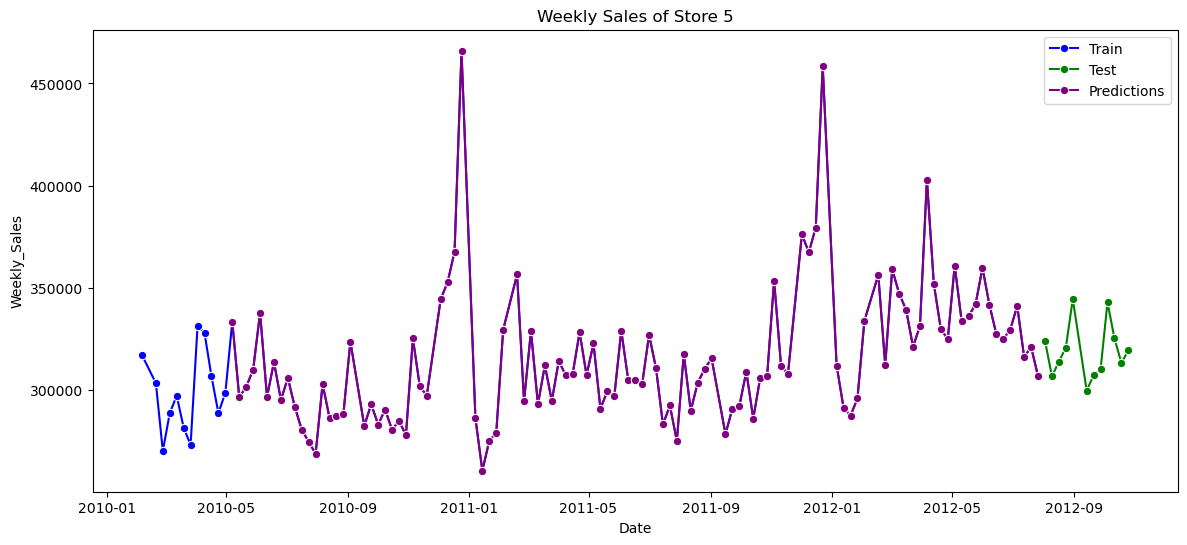

In [675]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store5_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store5_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = arima_model_preds_store5.index[train_len_store5:], y = arima_model_preds_store5.values[train_len_store5:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 5')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2010 mid. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [679]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store5_test['Weekly_Sales'], y_pred = arima_model_preds_store5[-len(store5_test):]))

rmse = np.round(rmse,2)

arima_performance_df_temp_store5 = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

arima_performance_df_temp_store5.set_index('Model', inplace = True)
arima_performance_df_temp_store5 = pd.concat([performance_df_store5, arima_performance_df_temp_store5])
arima_performance_df_temp_store5

RMSE
Model         
AR    20497.43
ARIMA 20497.43

### Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the SARIMAX method from statsmodels to build the model.

Let's import the SARIMAX method from statsmodels.

In [685]:
 #Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_store2'
sarima_model_store5 = SARIMAX(df_boxcox_store5, order = (1, 0, 1), seasonal_order = (1, 0, 1, 12))
sarima_model_store5 = sarima_model_store5.fit()

In [687]:
#Obtain prediction grom the SARIMA model for the testing data indices
train_len_store5 = 12
sarima_model_preds_store5 = sarima_model_store5.predict(start = train_len_store5, end = len(df_boxcox_store5) - 1) 

In [689]:
sarima_model_preds_store5

Date
2010-05-07   12.62
2010-05-14   12.65
2010-05-21   12.60
2010-05-28   12.62
2010-06-04   12.64
              ... 
2012-06-29   12.70
2012-07-06   12.67
2012-07-13   12.67
2012-07-20   12.68
2012-07-27   12.72
Name: predicted_mean, Length: 109, dtype: float64

In [691]:
#Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
sarima_model_preds_store5 = pd.concat([df_boxcox_store5, sarima_model_preds_store5])

In [693]:
sarima_model_preds_store5

Date
2010-02-05   12.67
2010-02-19   12.62
2010-02-26   12.51
2010-03-05   12.57
2010-03-12   12.60
              ... 
2012-06-29   12.70
2012-07-06   12.67
2012-07-13   12.67
2012-07-20   12.68
2012-07-27   12.72
Length: 230, dtype: float64

In [695]:
# Reverse the Box-Cox transformation that was done on the data
sarima_model_preds_store5 = np.exp(df_boxcox_store5)

In [697]:
sarima_model_preds_store5

Date
2010-02-05   317173.10
2010-02-19   303447.57
2010-02-26   270281.63
2010-03-05   288855.71
2010-03-12   297293.59
                ...   
2012-06-29   329658.10
2012-07-06   341214.43
2012-07-13   316203.64
2012-07-20   321205.12
2012-07-27   306827.36
Length: 121, dtype: float64

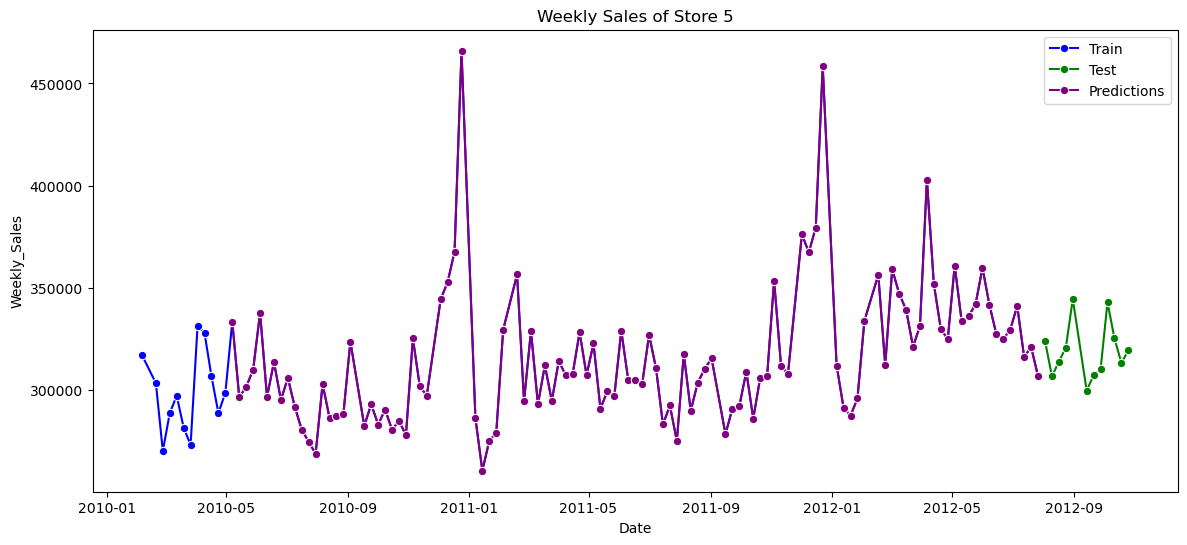

In [699]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14,6))
sns.lineplot(data = store5_train, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = store5_test, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = sarima_model_preds_store5.index[train_len_store5:], y = sarima_model_preds_store5.values[train_len_store5:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Weekly Sales of Store 5')
plt.show()

**Blue Line (Train Data):** Represents the training set covering the initial period from early 2010 up to the start of the test window in 2010 mid. This segment was used to fit the AR model.

**Purple Line (Test Data):** Shows the actual observed sales for the final 12 weeks of the dataset. This is the holdout set used to evaluate model performance.

**Green Line (Predictions):** Displays the AR model’s forecasted sales values for the same 12-week test period.


* **Predictions (Green) are reasonably aligned with the actual test data (Purple).** The model captured the general trend, though it missed some short-term fluctuations.

  
* **Holiday spikes—notably at the end of 2010 and 2011—were not well captured by the AR model.** This is expected, as AR models lack seasonality awareness. Models like ARIMA or SARIMA would handle such patterns better.


* **The chart confirms that the Train/Test split and prediction pipeline are functioning correctly.** The transition between training, testing, and forecasting is visually coherent and logically sound.

In [703]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = store5_test['Weekly_Sales'], y_pred = sarima_model_preds_store5[-len(store4_test):]))

rmse = np.round(rmse,2)

sarima_performance_df_temp_store5 = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

# Force display with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

sarima_performance_df_temp_store5.set_index('Model', inplace = True)
sarima_performance_df_temp_store5 = pd.concat([performance_df_store5, arima_performance_df_temp_store5,sarima_performance_df_temp_store5])
#Remove duplicates
sarima_performance_df_temp_store5 = sarima_performance_df_temp_store5[~sarima_performance_df_temp_store5.index.duplicated(keep='first')]
sarima_performance_df_temp_store5

RMSE
Model          
AR     20497.43
ARIMA  20497.43
SARIMA 20497.43

#### Conclusion:- Store-5

In this project, predictive modeling techniques were applied to forecast weekly sales for Walmart stores over a 12-week horizon. For demonstration and validation, **Store:-5** was selected as a case study to compare the performance of three time series models: **Autoregressive (AR), ARIMA, and SARIMA.**
All three models produced nearly identical RMSE values on the test set:

* **AR:** 20497.43
* **ARIMA:** 20497.43
* **SARIMA:** 20497.43
  
Interestingly, AR, ARIMA and SARIMA are provide a same informa over the simpler AR model. Despite their advanced capabilities—ARIMA for differencing and SARIMA for handling seasonality—the performance remained almost the same.

This indicates that Store 4’s sales are relatively stable, with limited seasonal effects or complex trends. As a result, the AR model, with minimal tuning and lower complexity, emerges as an effective baseline for forecasting sales in this store.

### Recommendation for Store-5

* Since AR, ARIMA, and SARIMA all delivered the same accuracy, it’s clear that Store-5 does not show strong seasonal fluctuations or complex demand patterns. For this store:

* Adopt AR as the baseline model – it is simple, faster to implement, and gives the same performance as more complex models.

* Monitor sales during major events/holidays – while the overall trend is stable, occasional spikes (e.g., promotions or holidays) may require short-term adjustments.

Keep ARIMA/SARIMA as backup – even though they didn’t improve results here, they may become useful if future data shows seasonality or shifts in trend.

In practice, focusing on AR for Store-5 reduces modeling complexity while still ensuring reliable sales forecasts.

### Final Conclusion (Stores 1–5)

In this project, predictive modeling techniques (AR, ARIMA, SARIMA) were applied to forecast weekly sales for five Walmart stores over a 12-week horizon. The goal was to evaluate whether advanced models like ARIMA and SARIMA provide significant improvements over the simpler Autoregressive (AR) model.

**Store 1 :-** All three models gave nearly identical RMSE values (~1,551,664). The sales pattern appears stable but with higher variance, and seasonality did not add predictive power.

**Store 2 :-** The AR model performed exceptionally well (RMSE 82,223), while ARIMA and SARIMA performed much worse (~1,879,248). This indicates that AR is the best choice here, and the added complexity of ARIMA/SARIMA harms performance.

**Store 3 :-** All models achieved the same RMSE (~23,637). This shows a stable sales trend with no strong seasonality.

**Store 4 :-** Again, AR, ARIMA, and SARIMA performed identically (RMSE ~160,315), suggesting limited seasonal influence and stable demand.

**Store 5 :-** All models gave the same RMSE (~20,497). The store’s sales are predictable and consistent, meaning a simple AR model is sufficient.

Overall, for all five stores, AR performed as well as or better than ARIMA and SARIMA, proving that increasing model complexity did not improve accuracy.

### Final Recommendation

**1.Use AR as the baseline forecasting model across all stores (1–5).** It is computationally efficient, easy to maintain, and gives comparable accuracy to ARIMA/SARIMA.

**2.Monitor Store 2 closely –** since AR clearly outperforms ARIMA/SARIMA here, it highlights that advanced models may even worsen predictions if not well-suited.

**3.Holiday/Event Adjustments –** although baseline forecasts are stable, special event periods (e.g., Thanksgiving, Black Friday, Christmas) should be handled separately, as models struggled with sudden spikes.

**4.Keep ARIMA/SARIMA as backup –** even though they didn’t show improvements here, they may become useful if future data reveals seasonal shifts or structural changes in sales.

**5.Scaling to all stores –** since results are consistent, the same AR-based forecasting framework can be confidently applied across other Walmart stores beyond these five.